In [1]:
import vcf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

In [2]:
### WHat samples can we use? -> Intersection between vcf, chol and confounder data ###
confounder=pd.read_csv("../Clinical_Data/AETIO_DIGPD_clinical_final.csv")
con_ids=confounder["AETID"].tolist()
print(len(con_ids))
#
vcf_reader = vcf.Reader(filename='../Aetionomy/AETIO_CS_postimpvcf.gz')
vcf_ids = list(vcf_reader.samples) #not consistent with cholesterol ids!!
print (len(vcf_ids))
#
chol=pd.read_csv("../Aetionomy/cholesterolData_AETIONOMYPD.tsv", sep="\t")
chol_ids=chol.index.values.tolist()
print (len(chol_ids))

790
350
135


In [3]:
ids_intersections = [x for x in chol_ids if x in vcf_ids and x in con_ids] # the ids we're using
len(ids_intersections) #106

106

In [46]:
################## OUTCOMES #######################

In [4]:
#load cholesterol data
dfs = pd.read_csv("../Aetionomy/cholesterolData_AETIONOMYPD.tsv", sep="\t")
print (dfs.isnull().values.any()) # no missing values

False


In [5]:
#keep only relevant ids from intersection!
dfs=dfs.filter(items=ids_intersections,axis=0)
len(dfs)

106

In [6]:
#rename awkward column names
dfs.columns=["24OH ng/ml","25OH ng/ml","27OH ng/ml","4ß ng/ml","7Keto ng/ml","7aOH ng/ml","7ß ng/ml","Brassicasterol µg/dl","Campestanol µg/dl","Campesterol mg/dl","Cholestanol mg/dl","Cholesterol GC mg/dl","Desmosterol mg/dl","DihydroLanesterol µg/dl","Lanesterol µg/dl","Lathosterol mg/dl","Series ID","Sitostanol µg/dl","Sitosterol mg/dl","Stigmasterol µg/dl"]
#drop series ID column
dfs=dfs.drop(["Series ID"],axis=1)

In [7]:
dfs

,24OH ng/ml,25OH ng/ml,27OH ng/ml,4ß ng/ml,7Keto ng/ml,7aOH ng/ml,7ß ng/ml,Brassicasterol µg/dl,Campestanol µg/dl,Campesterol mg/dl,Cholestanol mg/dl,Cholesterol GC mg/dl,Desmosterol mg/dl,DihydroLanesterol µg/dl,Lanesterol µg/dl,Lathosterol mg/dl,Sitostanol µg/dl,Sitosterol mg/dl,Stigmasterol µg/dl
AET0044,71,15.0,121,36.0,334,79,17.70,21.3,3.88,0.360,0.331,218,0.152,0.761,17.0,0.238,3.34,0.254,6.67
AET0380,69,10.0,218,26.8,249,81,14.20,58.5,7.14,0.802,0.502,226,0.106,0.439,17.8,0.115,5.44,0.526,9.34
AET0027,74,14.1,141,17.4,241,76,12.20,27.6,4.12,0.352,0.308,208,0.208,0.344,18.8,0.386,3.45,0.275,10.10
AET0049,98,16.0,176,32.1,292,148,14.10,60.5,6.21,0.556,0.466,218,0.216,1.020,34.8,0.316,5.02,0.440,14.60
AET0006,63,12.0,137,25.0,130,114,14.00,10.3,3.34,0.213,0.306,213,0.174,0.437,18.0,0.491,3.47,0.233,5.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AET0021,89,13.2,115,35.4,226,128,36.50,18.1,3.05,0.259,0.316,257,0.261,0.357,16.7,0.519,2.60,0.131,4.81
AET0071,56,16.7,152,26.5,272,89,18.30,21.4,3.41,0.238,0.186,226,0.162,0.497,17.0,0.209,2.88,0.174,4.05
AET0138,58,10.7,190,25.2,286,107,9.61,12.7,3.48,0.175,0.305,152,0.186,0.301,16.6,0.306,3.46,0.162,4.79
AET0111,92,22.2,149,29.2,408,208,17.30,55.1,9.04,0.572,0.534,248,0.217,0.593,27.0,0.299,6.91,0.620,24.60


In [8]:
#column list
columns=dfs.columns.tolist()

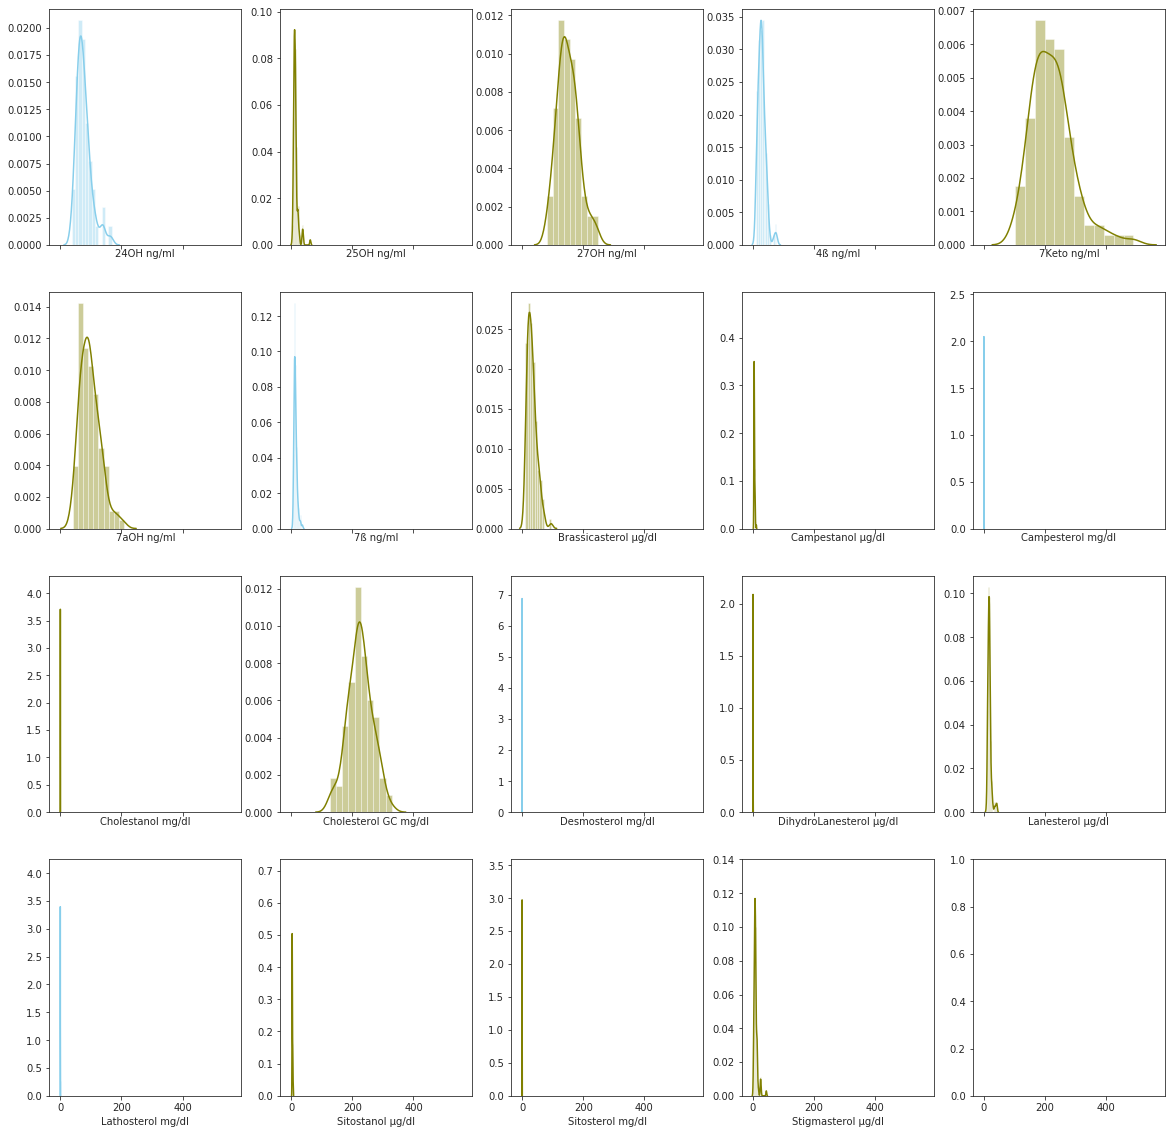

In [17]:
#plotting distplots
import seaborn as sns
import matplotlib.pyplot as plt
f, axes = plt.subplots(4,5,figsize=(20, 20), sharex=True)
sns.distplot(dfs[columns[0]] , color="skyblue",ax=axes[0, 0])
sns.distplot(dfs[columns[1]] , color="olive",ax=axes[0, 1])
sns.distplot(dfs[columns[2]] , color="olive",ax=axes[0, 2])
sns.distplot(dfs[columns[3]] , color="skyblue",ax=axes[0,3])
sns.distplot(dfs[columns[4]] , color="olive",ax=axes[0,4])
sns.distplot(dfs[columns[5]] , color="olive",ax=axes[1,0])
sns.distplot(dfs[columns[6]] , color="skyblue",ax=axes[1,1])
sns.distplot(dfs[columns[7]] , color="olive",ax=axes[1,2])
sns.distplot(dfs[columns[8]] , color="olive",ax=axes[1,3])
sns.distplot(dfs[columns[9]] , color="skyblue",ax=axes[1,4])
sns.distplot(dfs[columns[10]] , color="olive",ax=axes[2,0])
sns.distplot(dfs[columns[11]] , color="olive",ax=axes[2,1])
sns.distplot(dfs[columns[12]],color="skyblue",ax=axes[2,2])
sns.distplot(dfs[columns[13]],color="olive",ax=axes[2,3])
sns.distplot(dfs[columns[14]],color="olive",ax=axes[2,4])
sns.distplot(dfs[columns[15]],color="skyblue",ax=axes[3,0])
sns.distplot(dfs[columns[16]],color="olive",ax=axes[3,1])
sns.distplot(dfs[columns[17]],color="olive",ax=axes[3,2])
sns.distplot(dfs[columns[18]],color="olive",ax=axes[3,3])

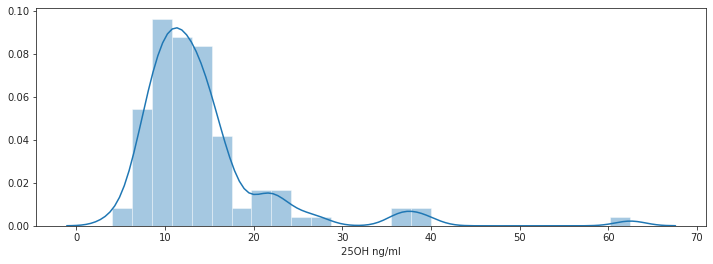

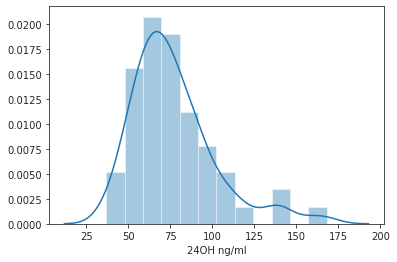

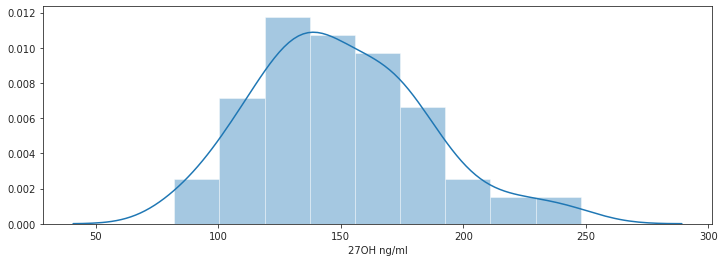

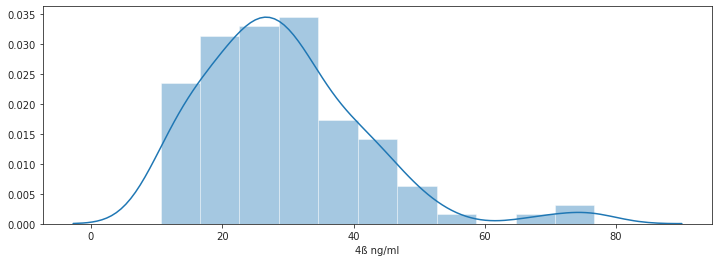

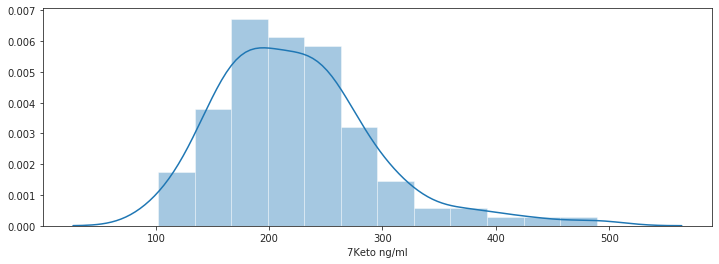

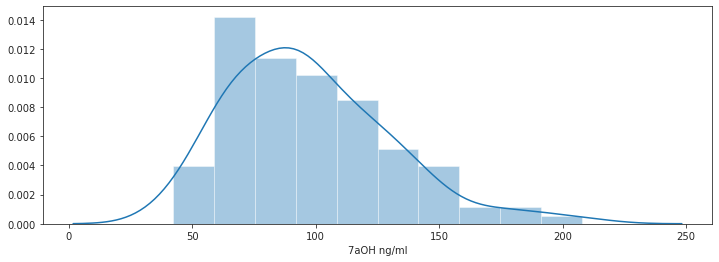

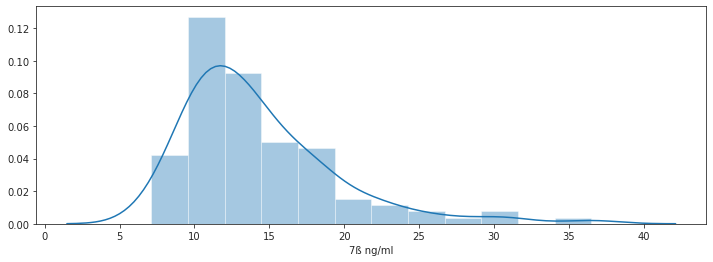

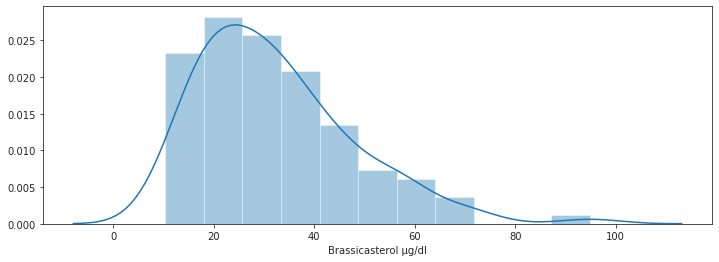

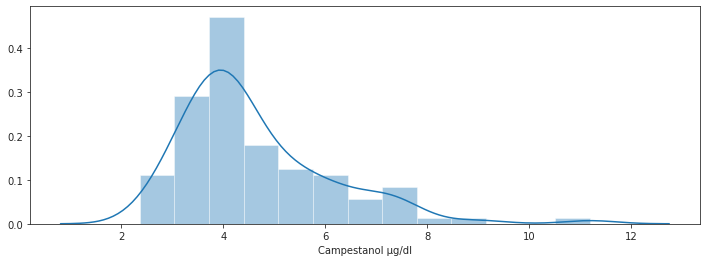

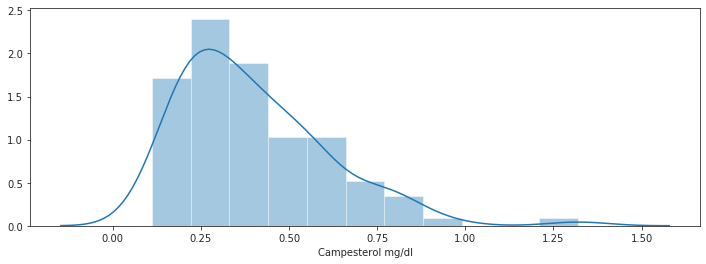

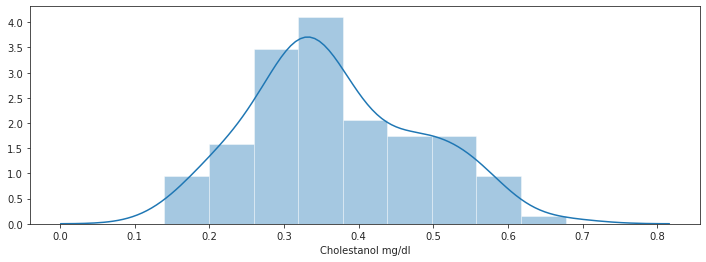

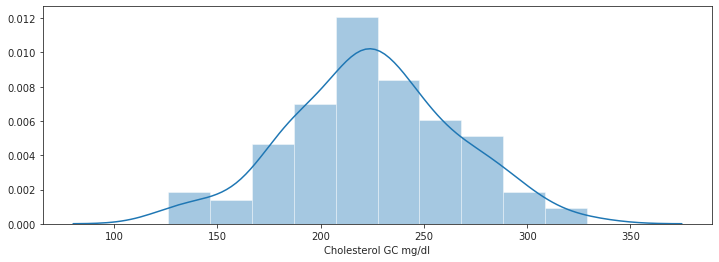

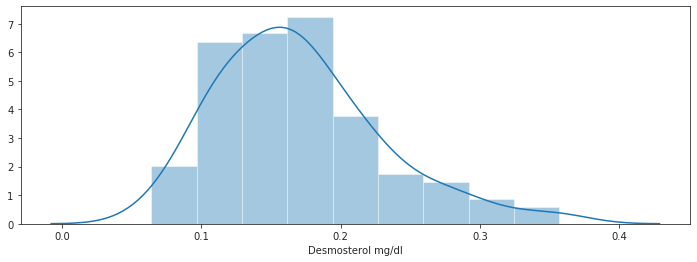

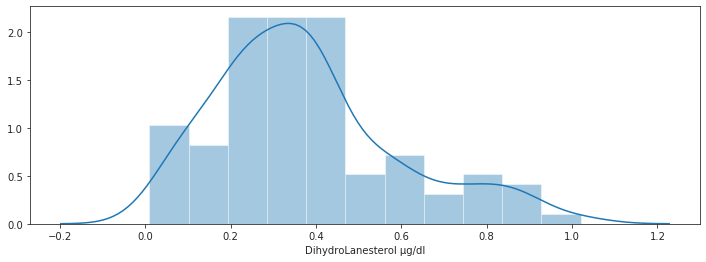

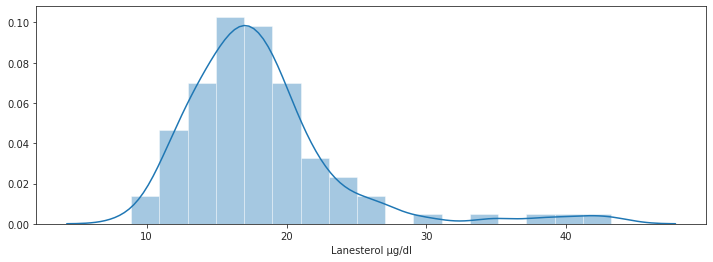

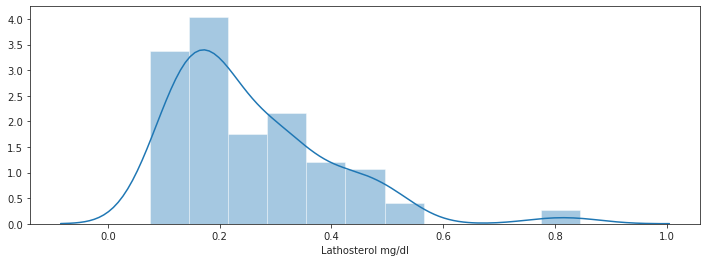

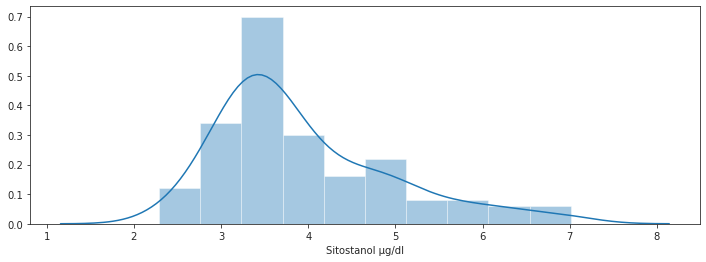

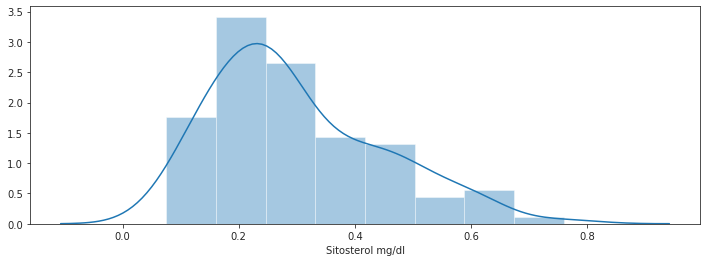

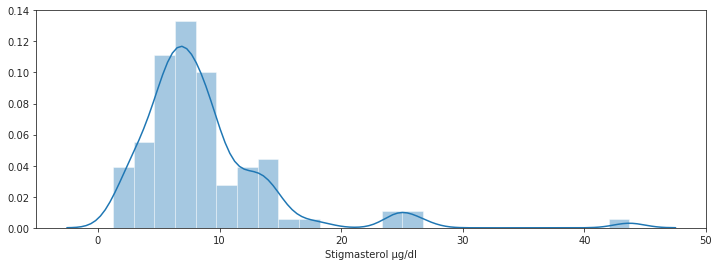

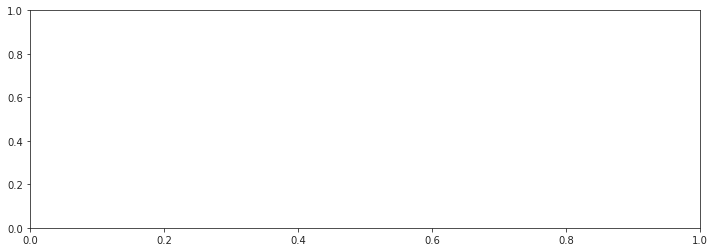

In [18]:
#check out distributions peu a peu
sns.set_style("ticks")
for i in range(len(columns)):
    fig,ax = plt.subplots(figsize=(12,4))
    plt.figure(i)
    sns.distplot(dfs[columns[i]])

Little Summary:

- Values more or less normal distributed
- Heavy variabilty in value ranges (see describe), std deviation

In [52]:
dfs.describe()

,24OH ng/ml,25OH ng/ml,27OH ng/ml,4ß ng/ml,7Keto ng/ml,7aOH ng/ml,7ß ng/ml,Brassicasterol µg/dl,Campestanol µg/dl,Campesterol mg/dl,Cholestanol mg/dl,Cholesterol GC mg/dl,Desmosterol mg/dl,DihydroLanesterol µg/dl,Lanesterol µg/dl,Lathosterol mg/dl,Sitostanol µg/dl,Sitosterol mg/dl,Stigmasterol µg/dl
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.00000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000
mean,76.896226,14.245943,150.056604,29.147170,223.669811,97.292453,14.272170,32.340566,4.61566,0.399217,0.368991,224.867925,0.170179,0.376547,18.156604,0.255057,3.940943,0.299604,8.725566
std,25.068641,8.035715,34.843003,12.527138,69.696037,32.766117,5.179253,15.515607,1.48711,0.210601,0.111134,39.903234,0.059694,0.217700,5.728658,0.141780,1.004485,0.145296,5.861418
min,37.000000,4.010000,82.000000,10.600000,102.000000,42.000000,7.110000,10.300000,2.36000,0.111000,0.140000,126.000000,0.064000,0.010000,8.900000,0.075000,2.290000,0.075000,1.250000
25%,60.500000,9.852500,127.250000,20.900000,174.000000,72.000000,10.625000,21.225000,3.65000,0.239000,0.305250,200.250000,0.127000,0.227000,14.625000,0.148000,3.262500,0.185750,5.650000
50%,72.500000,12.500000,148.000000,27.450000,215.500000,92.500000,13.150000,28.800000,4.21500,0.350000,0.347000,224.500000,0.162000,0.357000,17.050000,0.211500,3.640000,0.261500,7.460000
75%,87.500000,15.350000,171.750000,35.275000,255.000000,115.500000,16.700000,40.925000,5.32750,0.518500,0.458750,249.750000,0.204750,0.451500,19.600000,0.320250,4.482500,0.404750,9.760000
max,168.000000,62.500000,248.000000,76.700000,489.000000,208.000000,36.500000,94.900000,11.20000,1.320000,0.677000,329.000000,0.357000,1.020000,43.200000,0.845000,7.010000,0.760000,43.700000


In [20]:
#export dataframe
dfs.to_csv("cholesterole_raw.csv",index=True)

In [13]:
#### Holgers Advise: Normalizing by column sum for 24OH CHolesterol, 7aOH Cholesterol and 27OH Cholesterol

In [14]:
#deep copy of original dataframe
import copy
dfs_norm=copy.deepcopy(dfs)

In [15]:
#normalizing each column separately
dfs_norm["24OH ng/ml"]=dfs_norm["24OH ng/ml"]/dfs_norm["24OH ng/ml"].sum()

In [16]:
dfs_norm["7aOH ng/ml"]=dfs_norm["7aOH ng/ml"]/dfs_norm["7aOH ng/ml"].sum()

In [17]:
dfs_norm["27OH ng/ml"]=dfs_norm["27OH ng/ml"]/dfs_norm["27OH ng/ml"].sum()

In [18]:
dfs_norm.describe()

,24OH ng/ml,25OH ng/ml,27OH ng/ml,4ß ng/ml,7Keto ng/ml,7aOH ng/ml,7ß ng/ml,Brassicasterol µg/dl,Campestanol µg/dl,Campesterol mg/dl,Cholestanol mg/dl,Cholesterol GC mg/dl,Desmosterol mg/dl,DihydroLanesterol µg/dl,Lanesterol µg/dl,Lathosterol mg/dl,Sitostanol µg/dl,Sitosterol mg/dl,Stigmasterol µg/dl
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.00000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000
mean,0.009434,14.245943,0.009434,29.147170,223.669811,0.009434,14.272170,32.340566,4.61566,0.399217,0.368991,224.867925,0.170179,0.376547,18.156604,0.255057,3.940943,0.299604,8.725566
std,0.003076,8.035715,0.002191,12.527138,69.696037,0.003177,5.179253,15.515607,1.48711,0.210601,0.111134,39.903234,0.059694,0.217700,5.728658,0.141780,1.004485,0.145296,5.861418
min,0.004539,4.010000,0.005155,10.600000,102.000000,0.004073,7.110000,10.300000,2.36000,0.111000,0.140000,126.000000,0.064000,0.010000,8.900000,0.075000,2.290000,0.075000,1.250000
25%,0.007422,9.852500,0.008000,20.900000,174.000000,0.006981,10.625000,21.225000,3.65000,0.239000,0.305250,200.250000,0.127000,0.227000,14.625000,0.148000,3.262500,0.185750,5.650000
50%,0.008895,12.500000,0.009305,27.450000,215.500000,0.008969,13.150000,28.800000,4.21500,0.350000,0.347000,224.500000,0.162000,0.357000,17.050000,0.211500,3.640000,0.261500,7.460000
75%,0.010735,15.350000,0.010798,35.275000,255.000000,0.011199,16.700000,40.925000,5.32750,0.518500,0.458750,249.750000,0.204750,0.451500,19.600000,0.320250,4.482500,0.404750,9.760000
max,0.020611,62.500000,0.015592,76.700000,489.000000,0.020169,36.500000,94.900000,11.20000,1.320000,0.677000,329.000000,0.357000,1.020000,43.200000,0.845000,7.010000,0.760000,43.700000


In [21]:
#export dataframe
dfs_norm.to_csv("cholesterole_norm.csv",index=True)

In [57]:
#dfs=dfs.drop("Series ID",1)

In [9]:
#quantile normalization of all outcomes according to gemma developers
rank_mean = dfs.stack().groupby(dfs.rank(method='first').stack().astype(int)).mean()

In [10]:
dfs_quantile=dfs.rank(method='min').stack().astype(int).map(rank_mean).unstack()

In [11]:
dfs_quantile

,24OH ng/ml,25OH ng/ml,27OH ng/ml,4ß ng/ml,7Keto ng/ml,7aOH ng/ml,7ß ng/ml,Brassicasterol µg/dl,Campestanol µg/dl,Campesterol mg/dl,Cholestanol mg/dl,Cholesterol GC mg/dl,Desmosterol mg/dl,DihydroLanesterol µg/dl,Lanesterol µg/dl,Lathosterol mg/dl,Sitostanol µg/dl,Sitosterol mg/dl,Stigmasterol µg/dl
AET0044,44.501789,53.216105,36.000789,54.615000,69.383368,39.951632,56.958579,38.349158,41.458895,46.468789,43.094947,43.591789,42.802895,66.070737,44.753895,47.678211,39.662632,44.501789,42.482474
AET0380,43.706579,38.796263,72.340526,44.753895,51.578105,40.884368,49.633263,69.383368,67.878579,76.027737,59.671632,46.468789,32.804474,53.216105,47.678211,32.267158,64.537474,65.386895,52.602526
AET0027,46.848474,50.915842,43.286526,35.503211,50.270526,39.662632,43.286526,44.312421,44.008684,46.043947,38.796263,39.662632,55.210053,44.753895,51.290105,58.252789,42.802895,47.678211,55.210053
AET0049,60.311368,56.392579,56.745526,50.915842,61.334053,69.383368,47.913737,76.027737,61.334053,56.392579,55.210053,43.591789,56.958579,95.931000,77.954211,53.599895,59.671632,56.745526,66.070737
AET0006,38.796263,44.501789,42.482474,42.802895,28.043737,53.890158,47.678211,22.962895,34.404368,35.503211,38.349158,41.326737,48.101263,52.602526,48.101263,67.878579,43.591789,41.326737,39.177263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AET0021,54.615000,47.913737,34.619421,54.266684,46.973789,59.671632,95.931000,35.828737,31.469053,39.662632,40.884368,56.745526,65.386895,45.424895,43.094947,77.954211,25.072000,31.725579,35.503211
AET0071,35.148421,56.958579,47.494895,44.312421,57.628526,43.286526,58.947947,38.556632,35.148421,38.095684,25.072000,46.468789,45.424895,55.210053,44.753895,44.753895,30.366684,36.000789,33.430000
AET0138,36.215842,40.884368,62.025579,43.094947,60.311368,50.915842,32.689895,28.043737,36.000789,31.469053,38.095684,28.043737,51.578105,43.094947,42.802895,52.392526,43.286526,34.619421,35.148421
AET0111,56.392579,64.537474,46.676211,47.494895,82.076158,95.931000,55.210053,64.537474,86.392263,58.947947,64.537474,53.216105,58.252789,59.671632,69.383368,51.290105,86.392263,86.392263,76.027737


In [12]:
#keep chols with sigificant group difference according to Confounder_comparison_Model:
# - Stigmasterol, Sitosterol, Sitostanol, Campesterol, Campestanol
relevant_chols=["Campestanol µg/dl","Campesterol mg/dl","Stigmasterol µg/dl","Sitostanol µg/dl","Sitosterol mg/dl"]
dfs_relevantChols_quantilenormed=dfs_quantile.drop([x for x in dfs.columns if x not in relevant_chols],axis=1)

In [13]:
#write output
dfs_quantile.to_csv("../Cholesterol_Data/cholesterole_quantilenormed.csv",index=False,header=False,sep="\t")
#
dfs_relevantChols_quantilenormed.to_csv("../Cholesterol_Data/ANOVA_relevantChols_quantilenormed.txt",index=False,header=False,sep="\t")
#
dfs_relevantChols_quantilenormed.to_csv("../Cholesterol_Data/ANOVA_relevantChols_quantilenormed.csv",index=True,header=True,sep="\t")

In [ ]:
#
#
#

In [8]:
############################### CLINICAL DATA ####################################

In [9]:
#
#
#

In [10]:
pd.options.display.max_rows
pd.set_option('display.max_rows',106)
pd.set_option('display.max_columns',40)

In [4]:
confounder=pd.read_csv("../Clinical_Data/AETIO_DIGPD_clinical_final.csv")
confounder=confounder.set_index("AETID",inplace=False) #make AETID index
confounder.columns

Index(['Sex', 'Age_visit', 'Ethnicity', 'Smoking', 'Group', 'Cohort', 'DOB',
       'date_of_visit', 'date_diag_pd', 'Age_diag', 'time_diag_entry',
       'ann_clusters', 'total_mds1', 'total_mds2', 'total_mds3_off',
       'total_mds4', 'total_mmse', 'levodopa', 'total_moca', 'fab_total',
       'nmss_tot', 'pdq39_tot', 'total_mds3_on', 'hy_stage', 'epworth',
       'schwab', 'HADS_anxiety', 'HADS_depression', 'edu_level', 'coffee',
       'alcohol'],
      dtype='object')

In [5]:
def remove_values_from_list(the_list, val):
   return [value for value in the_list if value != val]

In [6]:
# keep only intersection of vcf, chol and confounder
confounder=confounder.filter(items=ids_intersections,axis=0)
len(confounder)
confounder

,Sex,Age_visit,Ethnicity,Smoking,Group,Cohort,DOB,date_of_visit,date_diag_pd,Age_diag,...,pdq39_tot,total_mds3_on,hy_stage,epworth,schwab,HADS_anxiety,HADS_depression,edu_level,coffee,alcohol
AETID,,,,,,,,,,,,,,,,,,,,,
AET0044,female,62,Asian,never,HCPD,AETIO,15/07/1954,22/07/2016,NaN,NaN,...,6.0,NaN,0.0,2.0,1.0,9.0,3.0,14.0,3.0,2.0
AET0380,male,69,Caucasian,ex,HCPD,AETIO,15/12/1947,22/11/2017,NaN,NaN,...,1.0,NaN,0.0,9.0,1.0,2.0,0.0,17.0,3.0,1.0
AET0027,female,43,Caucasian,never,HCPD,AETIO,15/06/1972,22/04/2016,NaN,NaN,...,31.0,NaN,0.0,5.0,1.0,9.0,0.0,12.0,2.0,1.0
AET0049,female,70,Caucasian,never,IPD,AETIO,15/04/1946,13/09/2016,01/01/2016,69.0,...,28.0,24.0,2.0,1.0,2.0,6.0,3.0,17.0,3.0,2.0
AET0006,male,69,Caucasian,ex,IPD,AETIO,15/09/1946,05/11/2015,15/02/2013,66.0,...,24.0,18.0,2.0,1.0,2.0,4.0,1.0,12.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AET0021,female,59,Caucasian,ex,HCPD,AETIO,15/06/1956,11/03/2016,NaN,NaN,...,7.0,NaN,0.0,0.0,1.0,5.0,1.0,14.0,3.0,2.0
AET0071,male,65,Caucasian,never,IPD,AETIO,15/12/1950,22/11/2016,15/12/2012,62.0,...,48.0,41.0,2.0,10.0,2.0,4.0,2.0,11.0,3.0,3.0
AET0138,female,65,Caucasian,never,IPD,AETIO,15/01/1952,27/07/2017,01/01/2016,63.0,...,5.0,19.0,2.0,4.0,1.0,2.0,0.0,13.0,3.0,2.0


In [7]:
features_to_drop=[x for x in confounder.columns if x not in ["Sex","Age_visit","Ethnicity","Smoking","Group","levodopa","coffee","alcohol"]]
features_to_drop

['Cohort',
 'DOB',
 'date_of_visit',
 'date_diag_pd',
 'Age_diag',
 'time_diag_entry',
 'ann_clusters',
 'total_mds1',
 'total_mds2',
 'total_mds3_off',
 'total_mds4',
 'total_mmse',
 'total_moca',
 'fab_total',
 'nmss_tot',
 'pdq39_tot',
 'total_mds3_on',
 'hy_stage',
 'epworth',
 'schwab',
 'HADS_anxiety',
 'HADS_depression',
 'edu_level']

## Important: Group: IPD = PD , HCPD = COntrolle!

In [8]:
#drop some features we dont need
confounder=confounder.drop(features_to_drop,axis=1)

In [9]:
#vizualization
#separation of features into categorical and numerical for further inspection
confounder_categorical=["Sex","Ethnicity","Smoking","levodopa","Group"]
confounder_numercial=[x for x in confounder.columns.tolist() if x not in confounder_categorical]

/home/tlordick/condaenv/lib/python3.6/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


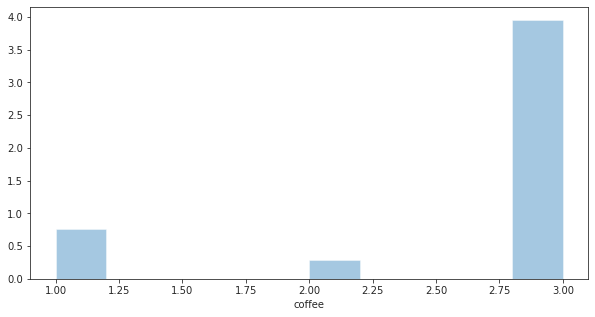

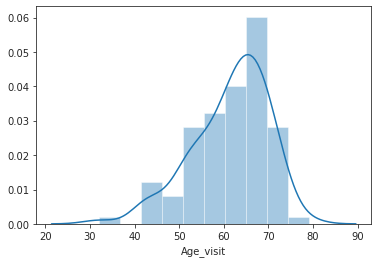

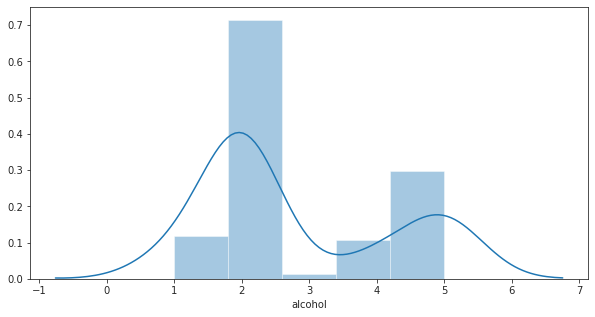

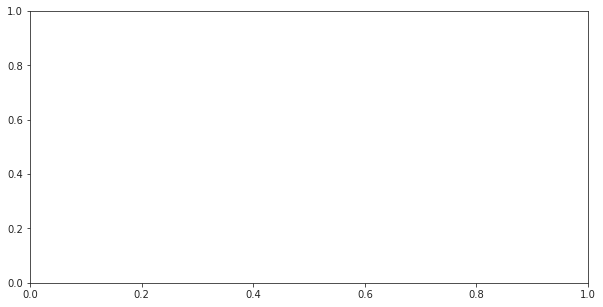

In [135]:
import seaborn as sns
#check out distributions of each numerical feature 

for i in range(len(confounder_numercial)):
    fig,ax = plt.subplots(figsize=(10,5))
    plt.figure(i)
    sns.distplot(confounder[confounder_numercial[i]])

In [136]:
# further inspection 

Text(0.5, 1.0, 'alcohol')

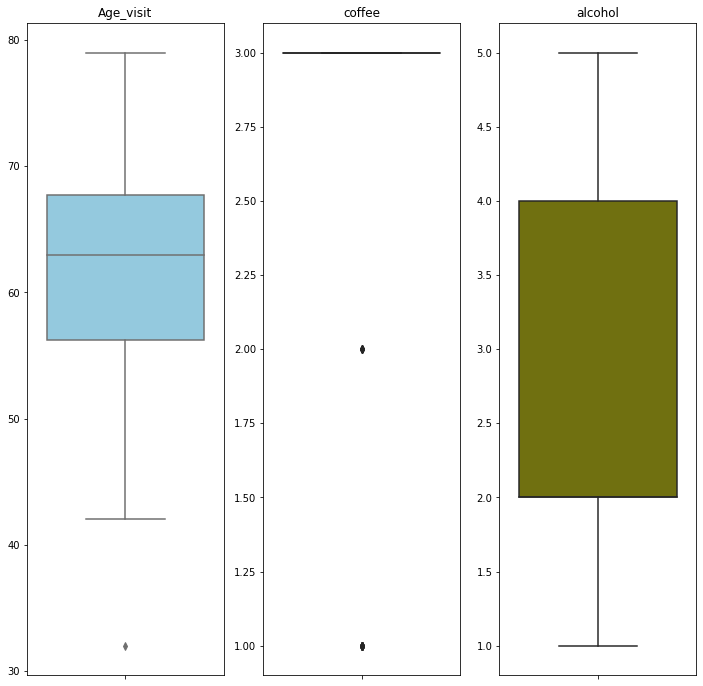

In [45]:
#boxplots of the numerical features
f, axes = plt.subplots(1,3,figsize=(12,12), sharex=True)

sns.boxplot(y=confounder[[confounder_numercial[0]]],color="skyblue",ax=axes[0]).set_title(confounder_numercial[0])
sns.boxplot(y=confounder[[confounder_numercial[1]]] , color="olive",ax=axes[1]).set_title(confounder_numercial[1])
sns.boxplot(y=confounder[[confounder_numercial[2]]] , color="olive",ax=axes[2]).set_title(confounder_numercial[2])

Text(0.5, 1.0, 'alcohol')

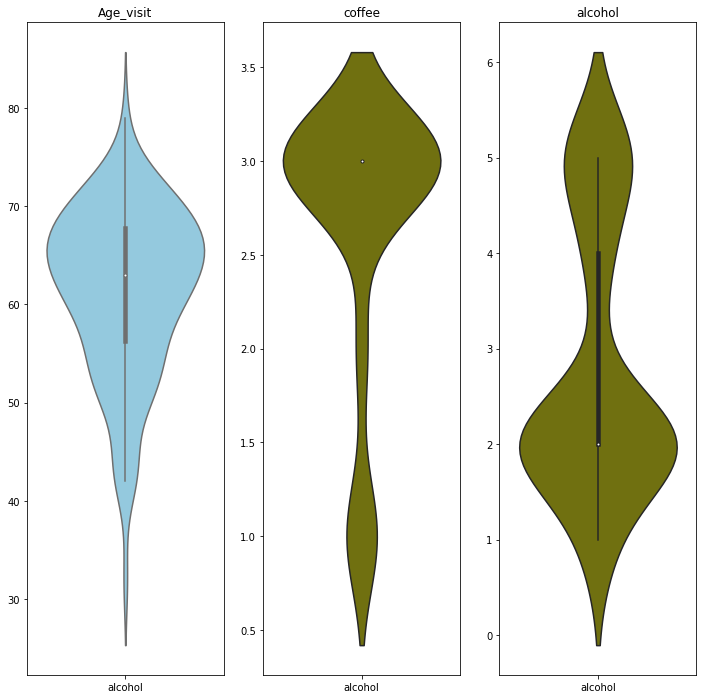

In [46]:
#violin plots of the numerical features
f, axes = plt.subplots(1,3,figsize=(12, 12), sharex=True)
sns.violinplot(data=confounder[[confounder_numercial[0]]],color="skyblue",ax=axes[0]).set_title(confounder_numercial[0])
sns.violinplot(data=confounder[[confounder_numercial[1]]] , color="olive",ax=axes[1]).set_title(confounder_numercial[1])
sns.violinplot(data=confounder[[confounder_numercial[2]]] , color="olive",ax=axes[2]).set_title(confounder_numercial[2])

In [10]:
#drop coffee ! 
confounder=confounder.drop("coffee",axis=1)

In [11]:
confounder_numercial.remove("coffee")

In [12]:
# pearson correlation testing
corr = confounder[confounder_numercial].corr()
corr.style.background_gradient(cmap='coolwarm')

,Age_visit,alcohol
Age_visit,1.000000,0.188220
alcohol,0.188220,1.000000


In [13]:
#spearman rank testing
corr = confounder[confounder_numercial].corr(method="spearman")
corr.style.background_gradient(cmap='coolwarm')

,Age_visit,alcohol
Age_visit,1.000000,0.226358
alcohol,0.226358,1.000000


In [14]:
#what might be worth dropping or put together
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
to_drop_high = [column for column in upper.columns if any(upper[column] > 0.800000)]
print ("corr high",to_drop_high)
to_drop_low = [column for column in upper.columns if any(upper[column] < - 0.8)]
print("high low corr", to_drop_low) #nothing

corr high []
high low corr []


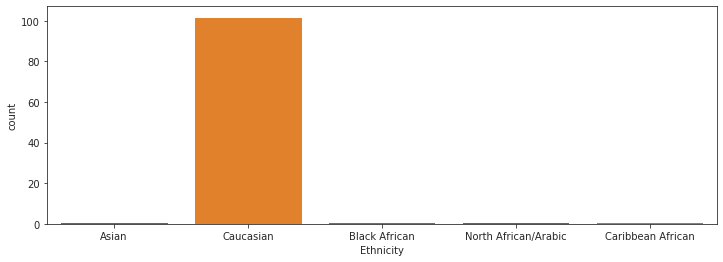

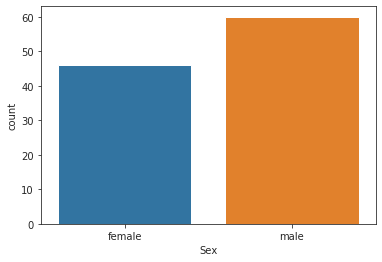

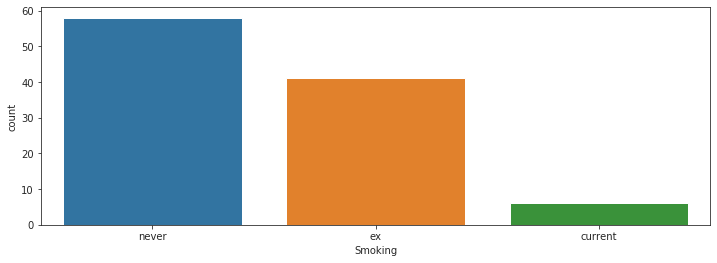

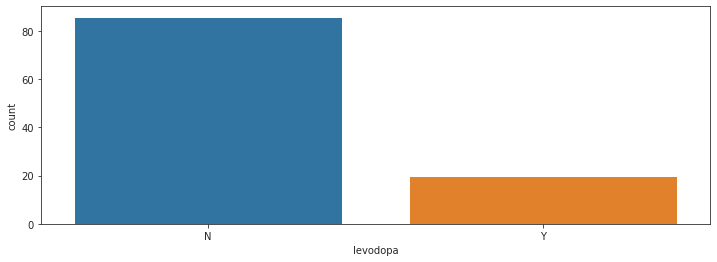

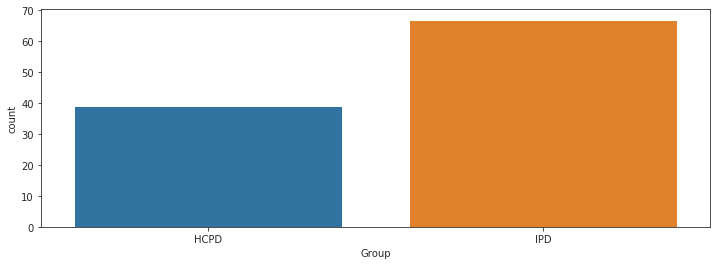

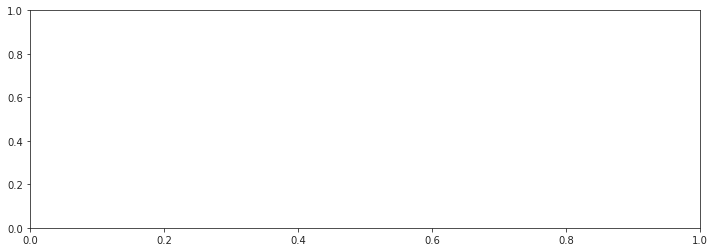

In [38]:
#distribution of categorical features
import matplotlib.pyplot as pl

for i in range(len(confounder_categorical)):
    fig,ax = plt.subplots(figsize=(12,4))
    plt.figure(i)
    sns.countplot(confounder[confounder_categorical[i]])

In [15]:
#drop ethnicity!
confounder=confounder.drop("Ethnicity",1)

In [16]:
confounder_categorical.remove("Ethnicity")

In [17]:
confounder_categorical

['Sex', 'Smoking', 'levodopa', 'Group']

In [18]:
################ imputation and first rough feature selection #############

In [19]:
#which column reveal missing values:
categoricals_to_impute=[]
numericals_to_impute=[]
for column_ in confounder.columns.tolist():
    if confounder[column_].isnull().sum(axis = 0) >0:
        print (column_)
        print ("Nr of missing values:",confounder[column_].isnull().sum(axis = 0))
        print ("Percentage", (int((confounder[column_].isnull().sum(axis = 0)))/106)*100)
        if column_ in confounder_categorical:
            categoricals_to_impute.append(column_)
        else:
            numericals_to_impute.append(column_)

Smoking
Nr of missing values: 1
Percentage 0.9433962264150944
alcohol
Nr of missing values: 1
Percentage 0.9433962264150944


In [20]:
print(categoricals_to_impute)
print (numericals_to_impute)

['Smoking']
['alcohol']


In [21]:
#imputing missing CATEGORICAL values
imp = SimpleImputer(missing_values=np.nan,strategy="most_frequent")
confounder[categoricals_to_impute]=imp.fit_transform(confounder[categoricals_to_impute])

In [22]:
confounder

,Sex,Age_visit,Smoking,Group,levodopa,alcohol
AETID,,,,,,
AET0044,female,62,never,HCPD,N,2.0
AET0380,male,69,ex,HCPD,Y,1.0
AET0027,female,43,never,HCPD,N,1.0
AET0049,female,70,never,IPD,N,2.0
AET0006,male,69,ex,IPD,Y,2.0
...,...,...,...,...,...,...
AET0021,female,59,ex,HCPD,N,2.0
AET0071,male,65,never,IPD,N,3.0
AET0138,female,65,never,IPD,N,2.0


In [23]:
#now encode categorical values into dummys: sex, group,levodopa
for cat in ['Sex', 'levodopa', 'Group']:
    bins = pd.get_dummies(confounder[cat], prefix=cat)
    confounder = confounder.drop(cat,axis = 1)
    # Join the encoded df
    confounder = confounder.join(bins)

In [24]:
#encode smoking differently: never = 0, ex= 1, current= 3
cleanup_nums = {"Smoking":     {"never": 0, "ex": 1, "current": 2}}
confounder=confounder.replace(cleanup_nums, inplace=False)

In [25]:
confounder

,Age_visit,Smoking,alcohol,Sex_female,Sex_male,levodopa_N,levodopa_Y,Group_HCPD,Group_IPD
AETID,,,,,,,,,
AET0044,62,0,2.0,1,0,1,0,1,0
AET0380,69,1,1.0,0,1,0,1,1,0
AET0027,43,0,1.0,1,0,1,0,1,0
AET0049,70,0,2.0,1,0,1,0,0,1
AET0006,69,1,2.0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...
AET0021,59,1,2.0,1,0,1,0,1,0
AET0071,65,0,3.0,0,1,1,0,0,1
AET0138,65,0,2.0,1,0,1,0,0,1


In [26]:
confounder_encoded=confounder

In [27]:
#################################################

In [28]:
##now impute numericals using scikit learn knn imputer!
imputer_knn = KNNImputer(n_neighbors=3)
imputer_knn.fit(confounder_encoded)
confounder_encoded[:]= imputer_knn.transform(confounder_encoded)

In [29]:
confounder_encoded.columns

Index(['Age_visit', 'Smoking', 'alcohol', 'Sex_female', 'Sex_male',
       'levodopa_N', 'levodopa_Y', 'Group_HCPD', 'Group_IPD'],
      dtype='object')

In [30]:
encoded_binary_columns=['Sex_female',
       'Sex_male', 'levodopa_N', 'levodopa_Y', 'Group_HCPD', 'Group_IPD'],

In [31]:
#transform binaries back to integers
for binary in encoded_binary_columns:
     confounder_encoded[binary]=confounder_encoded[binary].astype("int64")

In [32]:
confounder_encoded_imputed=confounder_encoded

In [33]:
confounder_encoded_imputed

,Age_visit,Smoking,alcohol,Sex_female,Sex_male,levodopa_N,levodopa_Y,Group_HCPD,Group_IPD
AETID,,,,,,,,,
AET0044,62.0,0.0,2.0,1,0,1,0,1,0
AET0380,69.0,1.0,1.0,0,1,0,1,1,0
AET0027,43.0,0.0,1.0,1,0,1,0,1,0
AET0049,70.0,0.0,2.0,1,0,1,0,0,1
AET0006,69.0,1.0,2.0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...
AET0021,59.0,1.0,2.0,1,0,1,0,1,0
AET0071,65.0,0.0,3.0,0,1,1,0,0,1
AET0138,65.0,0.0,2.0,1,0,1,0,0,1


In [34]:
confounder_encoded_imputed=confounder_encoded_imputed.drop(["Sex_male","levodopa_N","Group_HCPD"],1)

In [35]:
confounder_encoded_imputed.columns=["Age","Smoking","Alcohol","Sex","Levodopa","Group_IPD"]

In [43]:
confounder_encoded_imputed

,intercept,Age,Smoking,Alcohol,Sex,Levodopa,Group_IPD
AETID,,,,,,,
AET0044,1,0.062505,0.0,2.0,1,0,0
AET0380,1,0.890703,1.0,1.0,0,1,0
AET0027,1,-2.185458,0.0,1.0,1,0,0
AET0049,1,1.009017,0.0,2.0,1,0,1
AET0006,1,0.890703,1.0,2.0,0,1,1
...,...,...,...,...,...,...,...
AET0021,1,-0.292436,1.0,2.0,1,0,0
AET0071,1,0.417447,0.0,3.0,0,0,1
AET0138,1,0.417447,0.0,2.0,1,0,1


In [189]:
####################################################

In [37]:
#confounder_chols_final=pd.concat([dfs,confounder_encoded_imputed], axis=1)
# add intercept term for gemma
confounder_encoded_imputed["intercept"]=1
cols = confounder_encoded_imputed.columns.tolist()
cols.insert(0, cols.pop(cols.index('intercept')))
confounder_encoded_imputed= confounder_encoded_imputed.reindex(columns= cols)

In [104]:
confounder_encoded_imputed.to_csv("../Clinical_Data/Confounder6_raw_input_intercept.csv", sep="\t",index=False,header=False)

In [38]:
# SCALING, just standard scaler firs
ss = StandardScaler()
confounder_encoded_imputed_scaled=confounder_encoded_imputed
confounder_encoded_imputed_scaled[["Age"]] = ss.fit_transform(confounder_encoded_imputed_scaled[["Age"]])

In [39]:
# add intercept term for gemma
confounder_encoded_imputed_scaled["intercept"]=1

In [40]:
cols = confounder_encoded_imputed_scaled.columns.tolist()
cols.insert(0, cols.pop(cols.index('intercept')))
confounder_encoded_imputed_scaled = confounder_encoded_imputed_scaled.reindex(columns= cols)

In [41]:
confounder_encoded_imputed_scaled

,intercept,Age,Smoking,Alcohol,Sex,Levodopa,Group_IPD
AETID,,,,,,,
AET0044,1,0.062505,0.0,2.0,1,0,0
AET0380,1,0.890703,1.0,1.0,0,1,0
AET0027,1,-2.185458,0.0,1.0,1,0,0
AET0049,1,1.009017,0.0,2.0,1,0,1
AET0006,1,0.890703,1.0,2.0,0,1,1
...,...,...,...,...,...,...,...
AET0021,1,-0.292436,1.0,2.0,1,0,0
AET0071,1,0.417447,0.0,3.0,0,0,1
AET0138,1,0.417447,0.0,2.0,1,0,1


In [65]:
corr = confounder_encoded_imputed_scaled.corr()
corr.style.background_gradient(cmap='coolwarm')

/home/tlordick/.local/lib/python3.6/site-packages/pandas/io/formats/style.py:1089: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
/home/tlordick/.local/lib/python3.6/site-packages/pandas/io/formats/style.py:1090: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


,intercept,Age,Smoking,Alcohol,Sex,Levodopa,Group_IPD
intercept,nan,nan,nan,nan,nan,nan,nan
Age,nan,1.000000,0.001852,0.189444,0.023201,0.095757,0.160621
Smoking,nan,0.001852,1.000000,0.138799,-0.094752,-0.040009,-0.210992
Alcohol,nan,0.189444,0.138799,1.000000,-0.287809,-0.019079,0.188409
Sex,nan,0.023201,-0.094752,-0.287809,1.000000,-0.178997,-0.318750
Levodopa,nan,0.095757,-0.040009,-0.019079,-0.178997,1.000000,0.317926
Group_IPD,nan,0.160621,-0.210992,0.188409,-0.318750,0.317926,1.000000


In [42]:
#write output
confounder_encoded_imputed_scaled.to_csv("../Clinical_Data/Confounder6_scaled_input_intercept.csv",sep="\t",index=False,header=False)
#
confounder_encoded_imputed_scaled.to_csv("../Aetionomy/gemma_and_files/Confounder6_scaled_input_intercept.txt",sep="\t",index=False,header=False)
#
confounder_encoded_imputed_scaled.to_csv("../Clinical_Data/Counfounder6_scaled_input_intercept_headers",index=True,header=True)

In [45]:
# check out variation of cholesterols between patients and controls
groups=confounder_encoded_imputed_scaled.drop(["Age","Smoking","Alcohol","Sex","Levodopa"],axis=1)

In [46]:
chols_withgroup=pd.concat([dfs, groups],axis=1)
chols_withgroup

,24OH ng/ml,25OH ng/ml,27OH ng/ml,4ß ng/ml,7Keto ng/ml,7aOH ng/ml,7ß ng/ml,Brassicasterol µg/dl,Campestanol µg/dl,Campesterol mg/dl,Cholestanol mg/dl,Cholesterol GC mg/dl,Desmosterol mg/dl,DihydroLanesterol µg/dl,Lanesterol µg/dl,Lathosterol mg/dl,Sitostanol µg/dl,Sitosterol mg/dl,Stigmasterol µg/dl,Group_IPD
AETID,,,,,,,,,,,,,,,,,,,,
AET0044,71,15.00,121,36.0,334,79,17.70,21.3,3.88,0.360,0.331,218,0.152,0.761,17.0,0.238,3.34,0.254,6.67,0
AET0380,69,10.00,218,26.8,249,81,14.20,58.5,7.14,0.802,0.502,226,0.106,0.439,17.8,0.115,5.44,0.526,9.34,0
AET0027,74,14.10,141,17.4,241,76,12.20,27.6,4.12,0.352,0.308,208,0.208,0.344,18.8,0.386,3.45,0.275,10.10,0
AET0049,98,16.00,176,32.1,292,148,14.10,60.5,6.21,0.556,0.466,218,0.216,1.020,34.8,0.316,5.02,0.440,14.60,1
AET0006,63,12.00,137,25.0,130,114,14.00,10.3,3.34,0.213,0.306,213,0.174,0.437,18.0,0.491,3.47,0.233,5.80,1
AET0065,64,11.50,104,32.6,158,98,14.20,41.0,5.39,0.399,0.415,229,0.118,0.274,15.2,0.143,4.19,0.340,8.89,1
AET0374,53,10.20,122,14.3,226,72,10.20,18.5,3.87,0.227,0.188,134,0.127,0.398,19.3,0.156,3.74,0.240,5.99,1
AET0002,47,12.40,168,29.1,146,59,8.04,17.8,2.93,0.272,0.140,179,0.147,0.169,15.3,0.199,2.98,0.243,5.64,1
AET0110,86,15.20,153,18.5,240,94,16.00,30.7,5.54,0.410,0.319,226,0.188,0.186,14.2,0.279,4.29,0.183,3.85,0


In [ ]:
#check if chols are normally distributed

In [50]:
# Sort the dataframe by target
target_control = chols_withgroup.loc[chols_withgroup['Group_IPD'] == 0]
target_sick =  chols_withgroup.loc[chols_withgroup['Group_IPD'] == 1]

/home/tlordick/condaenv/lib/python3.6/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/tlordick/condaenv/lib/python3.6/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


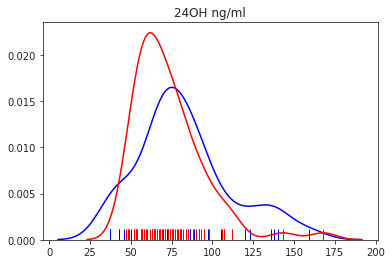

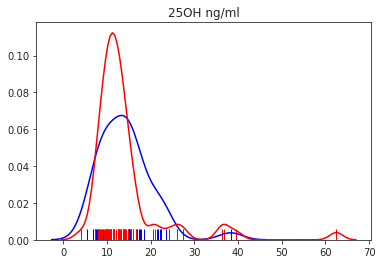

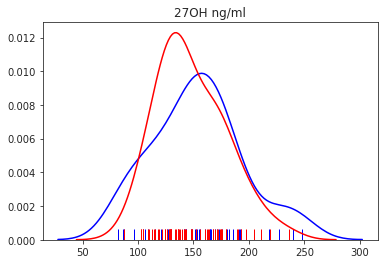

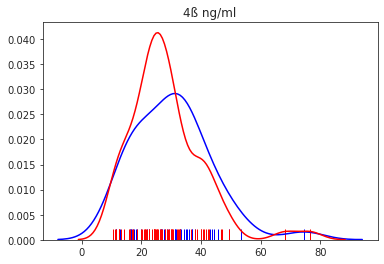

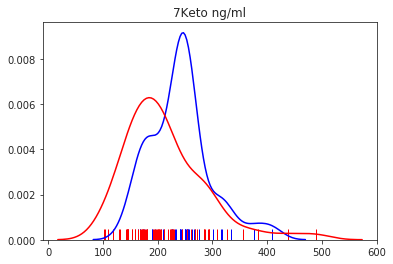

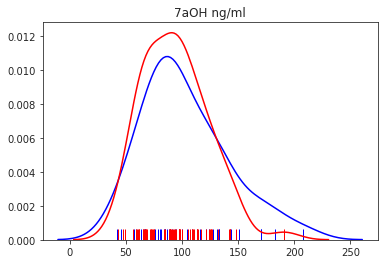

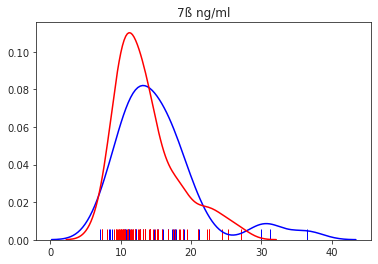

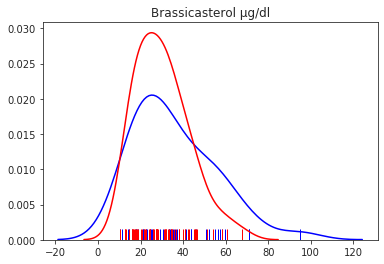

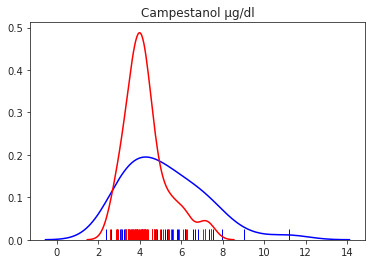

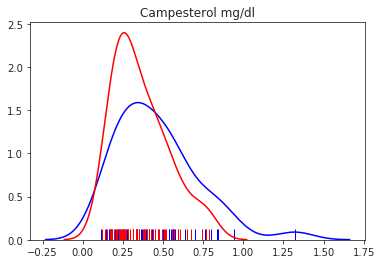

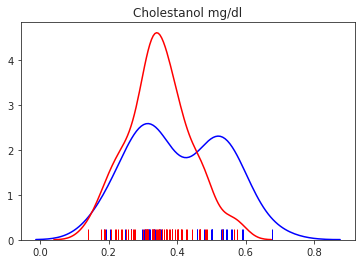

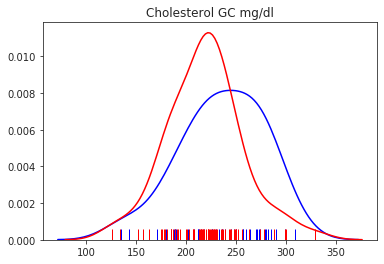

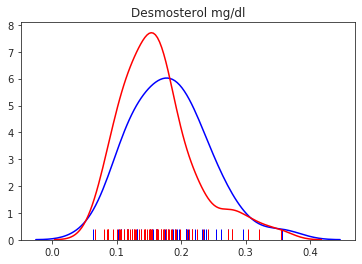

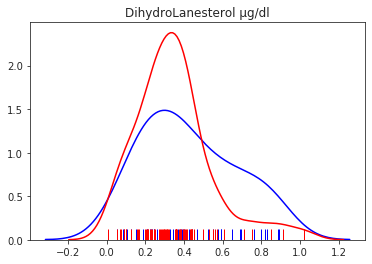

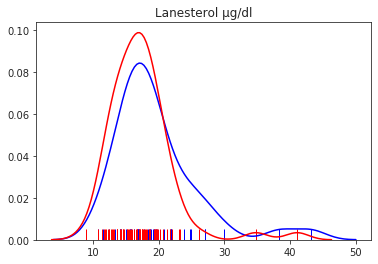

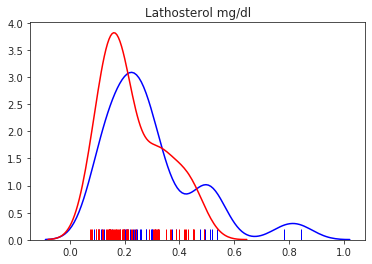

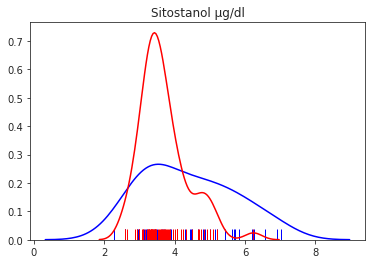

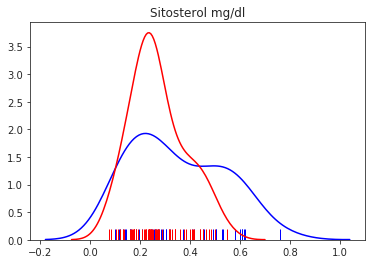

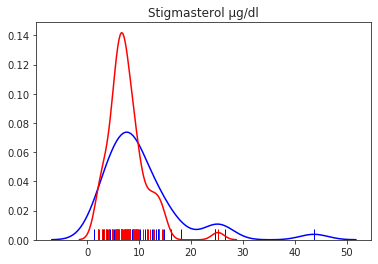

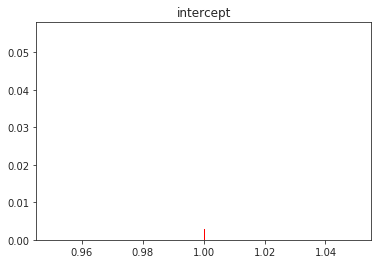

In [254]:
for i in chols_withgroup.columns[0:-1]:
    plt.figure(i)
    sns.distplot(target_control[[i]], hist=False, rug=True,color="Blue").set_title(i)
    sns.distplot(target_sick[[i]], hist=False, rug=True,color="Red").set_title(i)

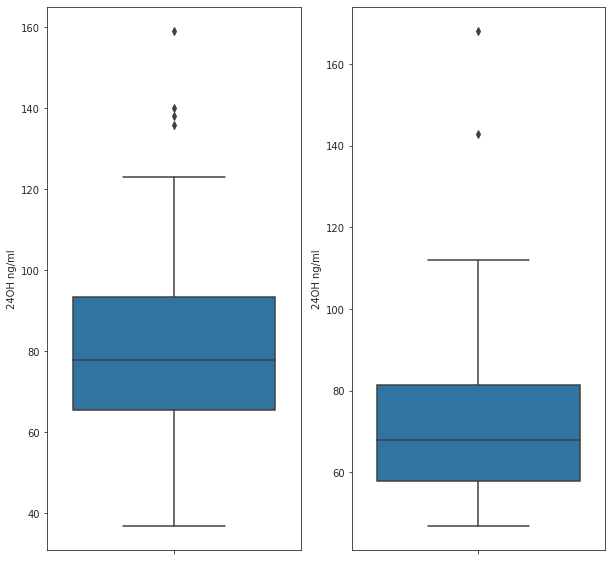

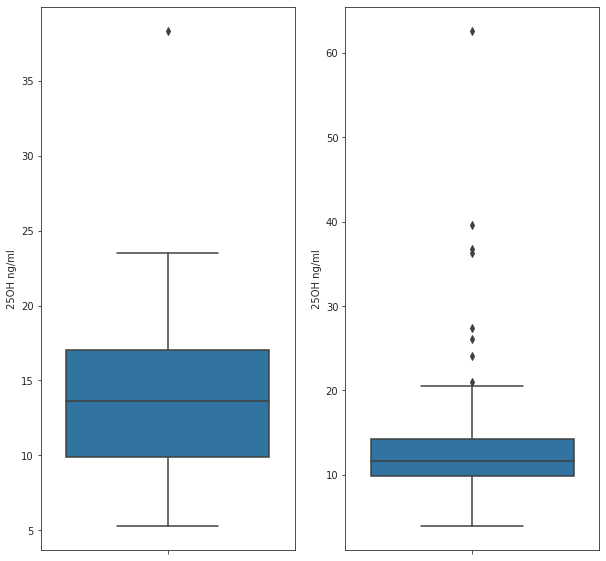

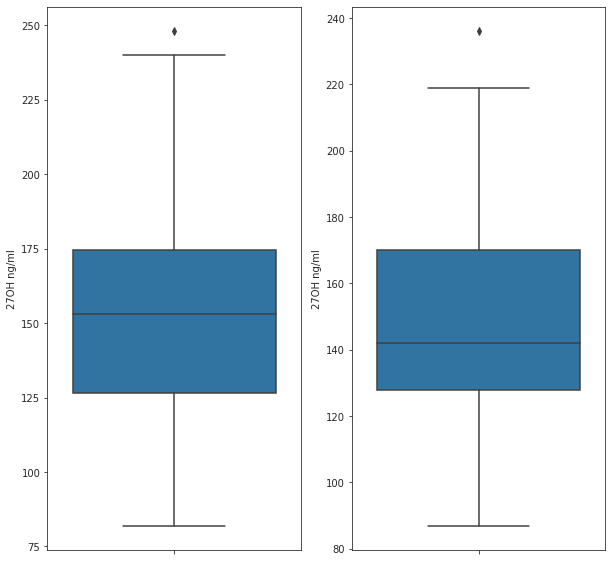

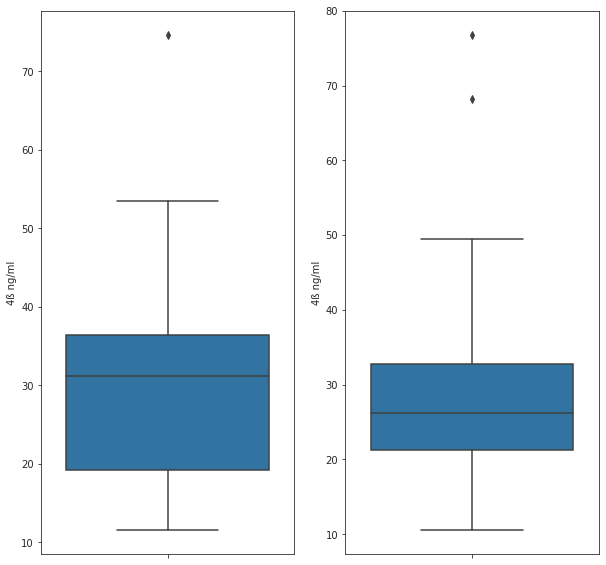

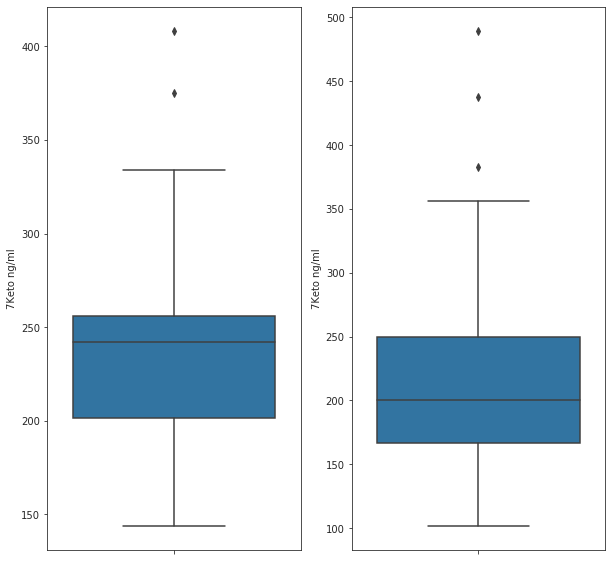

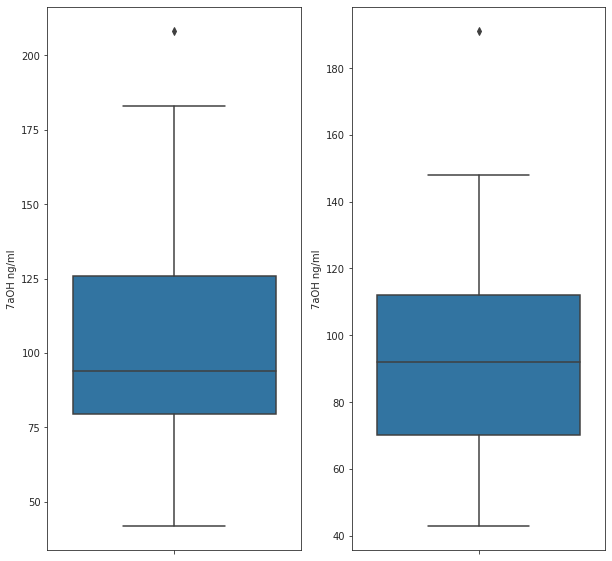

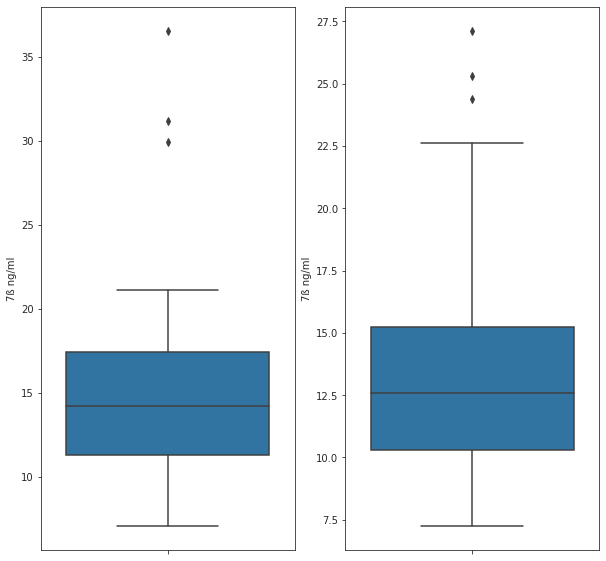

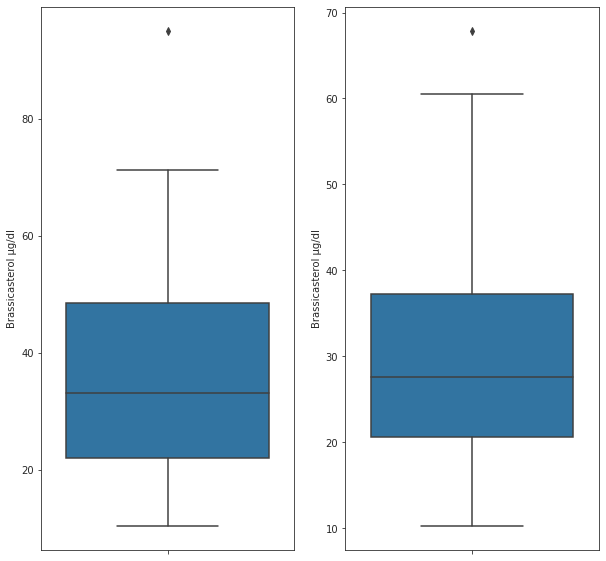

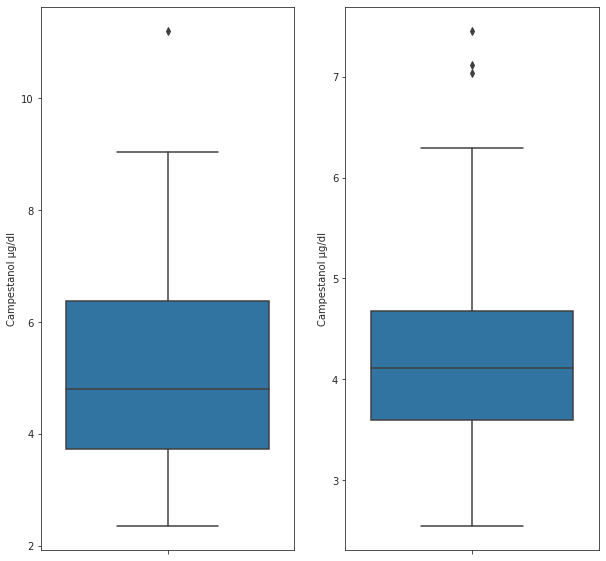

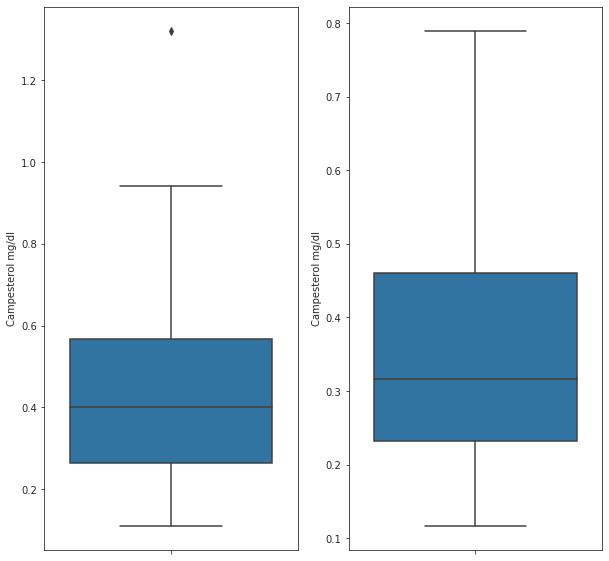

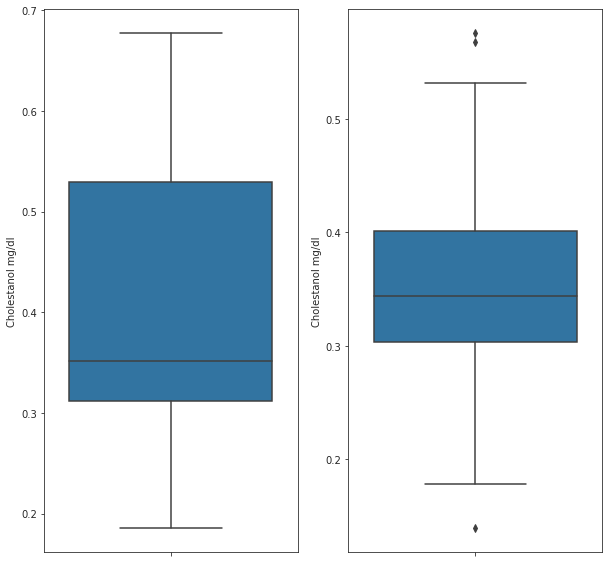

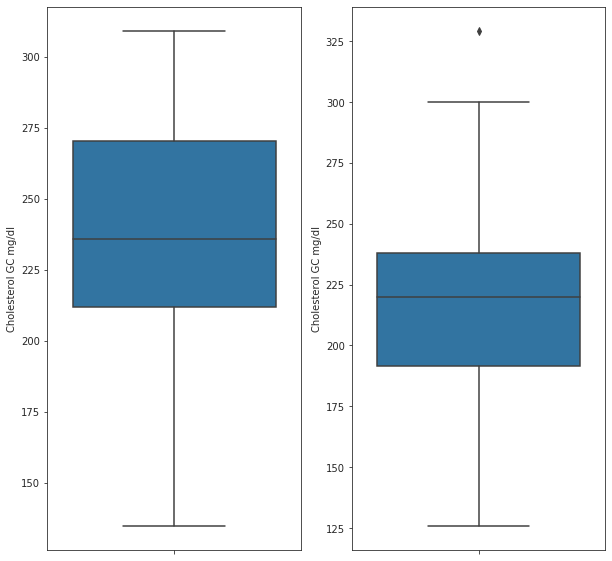

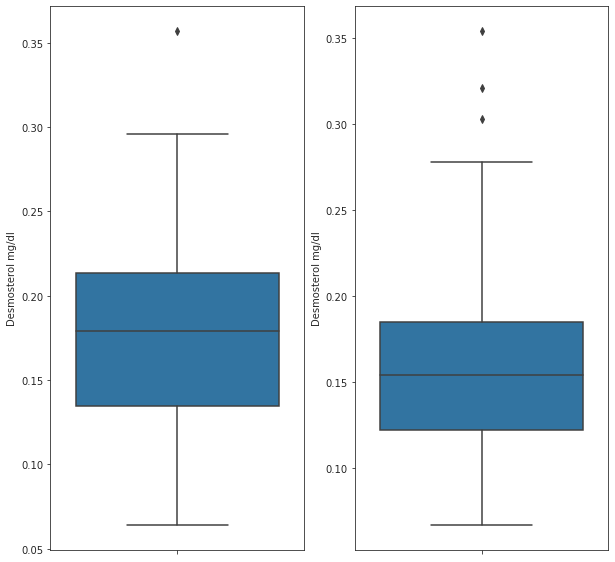

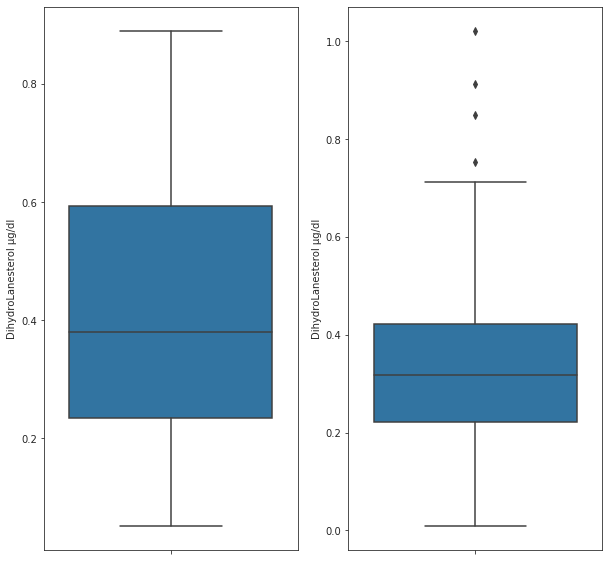

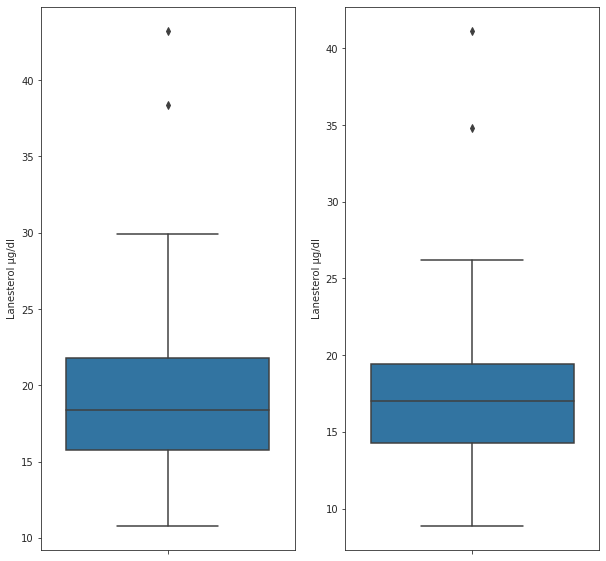

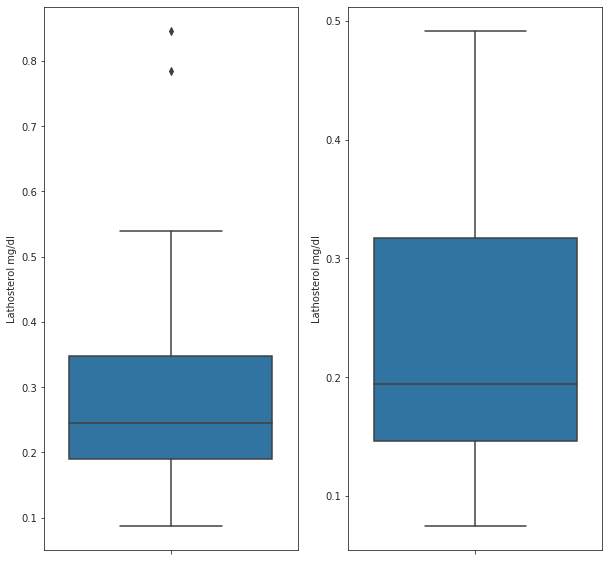

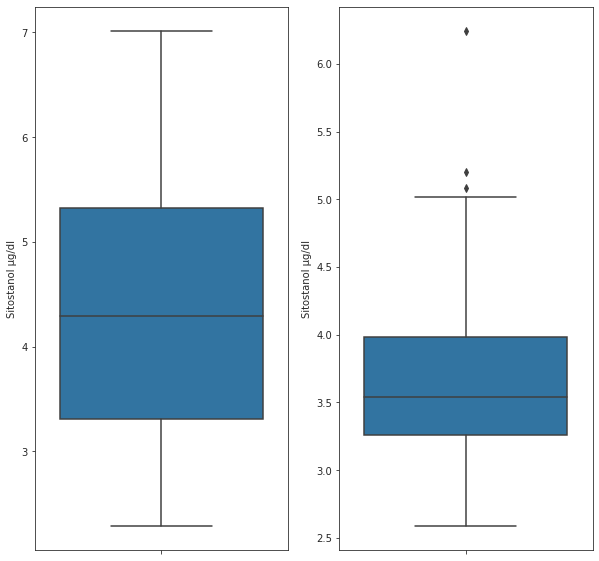

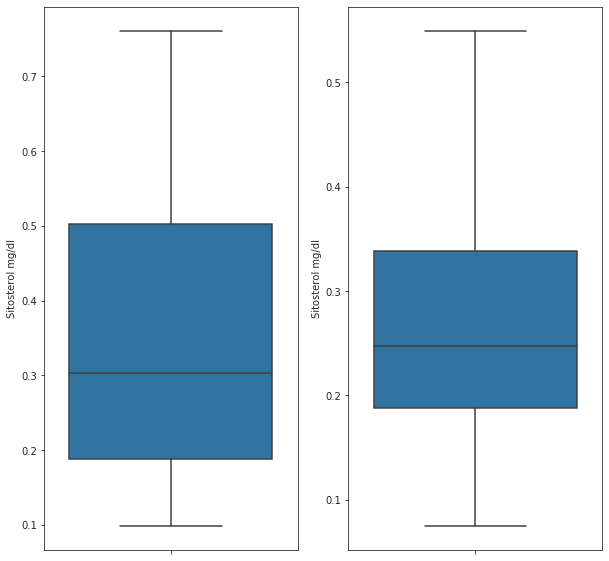

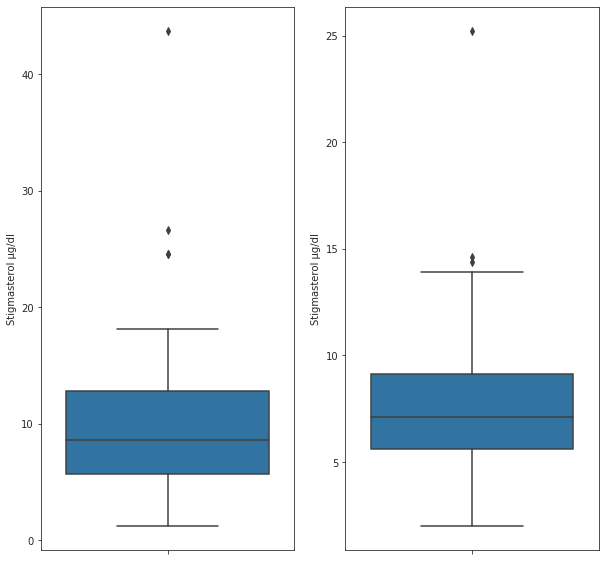

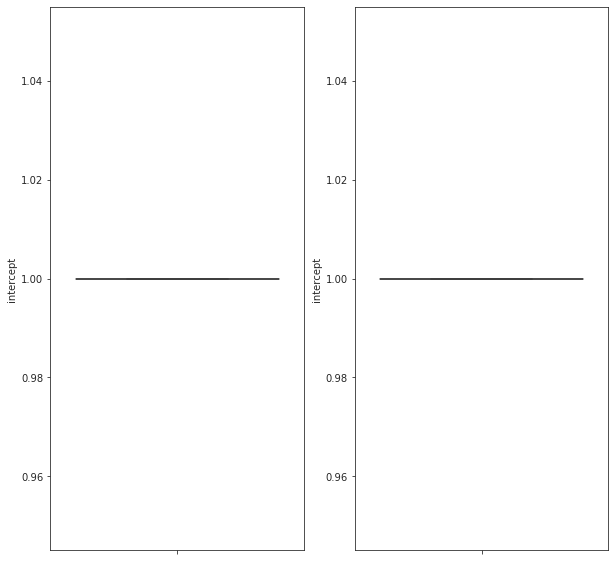

In [250]:
for i in chols_withgroup.columns[0:-1]:  
    f, axes = plt.subplots(1,2,figsize=(10,10), sharex=True)
    sns.boxplot(y=i,data=target_control,ax=axes[0])
    sns.boxplot(y=i,data=target_sick,ax=axes[1])

In [257]:
target_control.describe()

,24OH ng/ml,25OH ng/ml,27OH ng/ml,4ß ng/ml,7Keto ng/ml,7aOH ng/ml,7ß ng/ml,Brassicasterol µg/dl,Campestanol µg/dl,Campesterol mg/dl,Cholestanol mg/dl,Cholesterol GC mg/dl,Desmosterol mg/dl,DihydroLanesterol µg/dl,Lanesterol µg/dl,Lathosterol mg/dl,Sitostanol µg/dl,Sitosterol mg/dl,Stigmasterol µg/dl,intercept,Group_IPD
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.0,39.0
mean,82.641026,14.210256,153.256410,30.469231,241.435897,102.974359,15.338974,36.066667,5.204872,0.461949,0.405795,235.769231,0.181615,0.427308,19.600000,0.295974,4.377692,0.349385,10.591026,1.0,0.0
std,29.108226,6.184321,40.590197,12.972119,56.582401,38.247454,6.142995,19.215760,1.913773,0.255936,0.130298,41.628344,0.060146,0.240897,6.637572,0.174646,1.287160,0.182694,8.071739,0.0,0.0
min,37.000000,5.310000,82.000000,11.600000,144.000000,42.000000,7.110000,10.500000,2.360000,0.111000,0.186000,135.000000,0.064000,0.052000,10.800000,0.088000,2.290000,0.099000,1.250000,1.0,0.0
25%,65.500000,9.895000,126.500000,19.200000,201.500000,79.500000,11.300000,22.000000,3.730000,0.263500,0.312000,212.000000,0.134500,0.233500,15.750000,0.190500,3.305000,0.188000,5.680000,1.0,0.0
50%,78.000000,13.600000,153.000000,31.200000,242.000000,94.000000,14.200000,33.200000,4.810000,0.400000,0.352000,236.000000,0.179000,0.380000,18.400000,0.245000,4.290000,0.303000,8.630000,1.0,0.0
75%,93.500000,17.000000,174.500000,36.450000,256.000000,126.000000,17.450000,48.600000,6.370000,0.567000,0.529000,270.500000,0.213500,0.593000,21.800000,0.347500,5.325000,0.502500,12.850000,1.0,0.0
max,159.000000,38.300000,248.000000,74.600000,408.000000,208.000000,36.500000,94.900000,11.200000,1.320000,0.677000,309.000000,0.357000,0.889000,43.200000,0.845000,7.010000,0.760000,43.700000,1.0,0.0


In [258]:
target_sick.describe()

,24OH ng/ml,25OH ng/ml,27OH ng/ml,4ß ng/ml,7Keto ng/ml,7aOH ng/ml,7ß ng/ml,Brassicasterol µg/dl,Campestanol µg/dl,Campesterol mg/dl,Cholestanol mg/dl,Cholesterol GC mg/dl,Desmosterol mg/dl,DihydroLanesterol µg/dl,Lanesterol µg/dl,Lathosterol mg/dl,Sitostanol µg/dl,Sitosterol mg/dl,Stigmasterol µg/dl,intercept,Group_IPD
count,67.000000,67.000000,67.00000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.0,67.0
mean,73.552239,14.266716,148.19403,28.377612,213.328358,93.985075,13.651194,30.171642,4.272687,0.362701,0.347567,218.522388,0.163522,0.347000,17.316418,0.231239,3.686716,0.270627,7.639701,1.0,1.0
std,21.933981,8.983752,31.19695,12.293899,74.762936,28.906585,4.459220,12.546336,1.041636,0.170787,0.092778,37.740083,0.058855,0.198941,4.989553,0.113373,0.687735,0.109780,3.727197,0.0,0.0
min,47.000000,4.010000,87.00000,10.600000,102.000000,43.000000,7.260000,10.300000,2.550000,0.117000,0.140000,126.000000,0.067000,0.010000,8.900000,0.075000,2.590000,0.075000,2.020000,1.0,1.0
25%,58.000000,9.840000,128.00000,21.300000,166.500000,70.000000,10.300000,20.600000,3.600000,0.231500,0.303000,191.500000,0.122500,0.221000,14.250000,0.146000,3.260000,0.187500,5.625000,1.0,1.0
50%,68.000000,11.600000,142.00000,26.200000,200.000000,92.000000,12.600000,27.600000,4.110000,0.316000,0.344000,220.000000,0.154000,0.317000,17.000000,0.194000,3.540000,0.247000,7.120000,1.0,1.0
75%,81.500000,14.250000,170.00000,32.800000,249.500000,112.000000,15.250000,37.250000,4.680000,0.461000,0.401500,238.000000,0.185000,0.423000,19.400000,0.317000,3.980000,0.338500,9.130000,1.0,1.0
max,168.000000,62.500000,236.00000,76.700000,489.000000,191.000000,27.100000,67.800000,7.450000,0.789000,0.575000,329.000000,0.354000,1.020000,41.100000,0.491000,6.240000,0.549000,25.200000,1.0,1.0


In [51]:
# t-test between the groups
from scipy import stats
stats.ttest_ind(target_control["24OH ng/ml"],target_sick["24OH ng/ml"],equal_var = False)

Ttest_indResult(statistic=1.6904889788453743, pvalue=0.09585435085723892)

In [273]:
print(stats.ttest_ind(target_control["25OH ng/ml"],target_sick["25OH ng/ml"],equal_var = False))

Ttest_indResult(statistic=-0.03819352591873826, pvalue=0.9696087940792402)


In [266]:
stats.ttest_ind(target_control["27OH ng/ml"],target_sick["27OH ng/ml"],equal_var = False)

Ttest_indResult(statistic=0.6718776187225994, pvalue=0.504070393014431)

In [ ]:
stats.ttest_ind(target_control["24OH ng/ml"],target_sick["24OH ng/ml"],equal_var = False)

In [ ]:
# 1. Cholesterole normal verteilt? Wenn ja:
# 2. Hat die Gruppe einen siginifikanten Effekt auf die Cholesterole?
# 3. 2 Confounder Modelle: a) Alle confounder ohne Gruppe b) Alle counfounder mit Gruppe
# 4. Bei welchen Cholesterolen macht die Gruppe einen signifikanten Unterschied zwischen den Modellen? -> diese benutzen!

Welsch Test for each chol between healthy and Parkinson individuals
Significance: 10 %

24OH ng/ml
Ttest_indResult(statistic=1.6904889788453743, pvalue=0.09585435085723892)

7Keto ng/ml
Ttest_indResult(statistic=2.1847500953324563, pvalue=0.03131918509531025)

Brassicasterol µg/dl
Ttest_indResult(statistic=1.714855618248524, pvalue=0.09178794008324959)

Campestanol µg/dl
Ttest_indResult(statistic=2.8093035348609066, pvalue=0.00700673055725035)

Campesterol mg/dl
Ttest_indResult(statistic=2.158104736994317, pvalue=0.035071497995383824)

Cholestanol mg/dl
Ttest_indResult(statistic=2.4522704262375354, pvalue=0.017087416434693286)

Cholesterol GC mg/dl
Ttest_indResult(statistic=2.127906669017543, pvalue=0.03670371664769241)

DihydroLanesterol µg/dl
Ttest_indResult(statistic=1.761418723166806, pvalue=0.08266338128458961)

Lanesterol µg/dl
Ttest_indResult(statistic=1.8637588487301775, pvalue=0.06700424185829092)

Lathosterol mg/dl
Ttest_indResult(statistic=2.0743449159547014, pvalue=0.042577

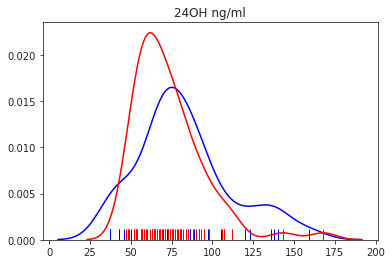

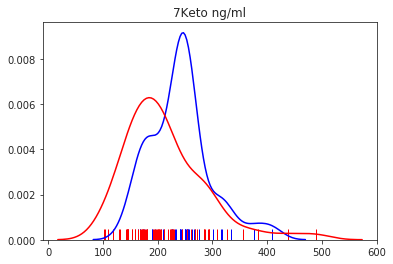

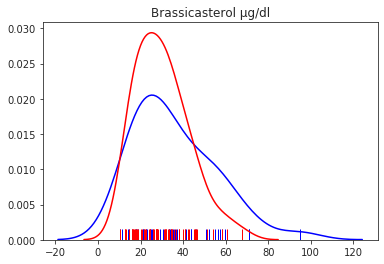

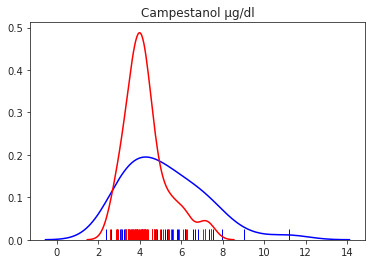

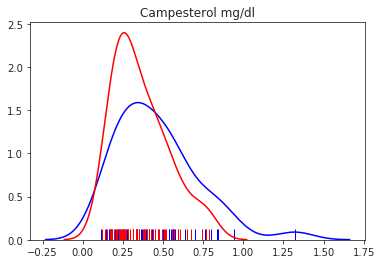

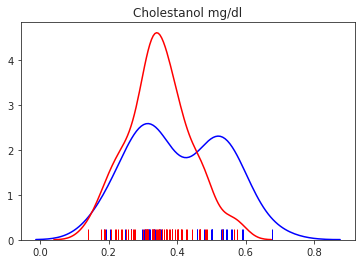

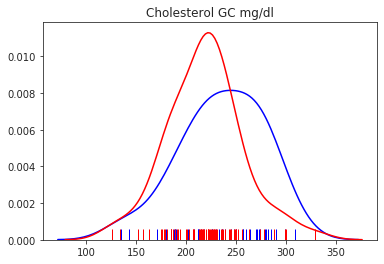

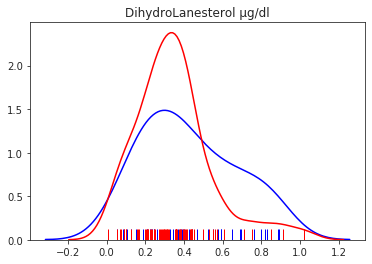

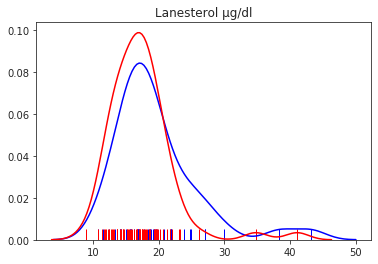

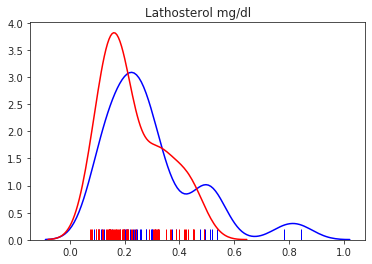

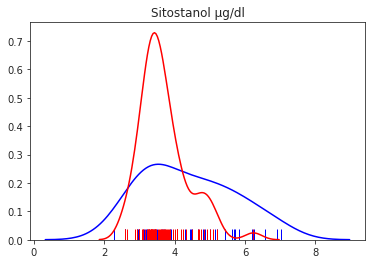

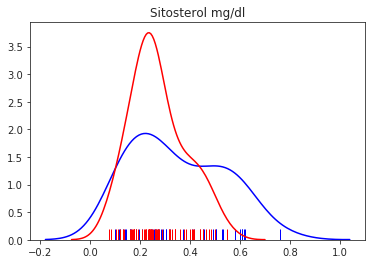

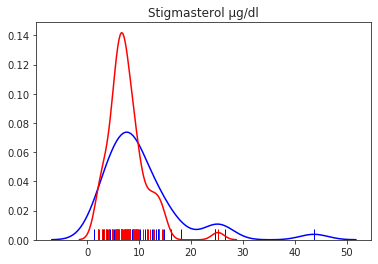

In [286]:
print ("Welsch Test for each chol between healthy and Parkinson individuals")
print ("Significance: 10 %")
print ()
a=0

for i in chols_withgroup.columns[0:-1]:
    result=stats.ttest_ind(target_control[i],target_sick[i],equal_var=False)
    if result[1]<0.1:
        a+=1
        print (i)
        print (result)
        plt.figure(i)
        sns.distplot(target_control[[i]], hist=False, rug=True,color="Blue").set_title(i)
        sns.distplot(target_sick[[i]], hist=False, rug=True,color="Red").set_title(i)
        print ()
print ("Cholesterols we keep:",a)

Welsch Test for each chol between healthy and Parkinson individuals
Significance: 5 %

7Keto ng/ml
Ttest_indResult(statistic=2.1847500953324563, pvalue=0.03131918509531025)

Campestanol µg/dl
Ttest_indResult(statistic=2.8093035348609066, pvalue=0.00700673055725035)

Campesterol mg/dl
Ttest_indResult(statistic=2.158104736994317, pvalue=0.035071497995383824)

Cholestanol mg/dl
Ttest_indResult(statistic=2.4522704262375354, pvalue=0.017087416434693286)

Cholesterol GC mg/dl
Ttest_indResult(statistic=2.127906669017543, pvalue=0.03670371664769241)

Lathosterol mg/dl
Ttest_indResult(statistic=2.0743449159547014, pvalue=0.04257786087118468)

Sitostanol µg/dl
Ttest_indResult(statistic=3.104421008463332, pvalue=0.003112166250017411)

Sitosterol mg/dl
Ttest_indResult(statistic=2.447238531118408, pvalue=0.017662151783976676)

Stigmasterol µg/dl
Ttest_indResult(statistic=2.1536589348018644, pvalue=0.03636202313047304)

Cholesterols we keep: 9


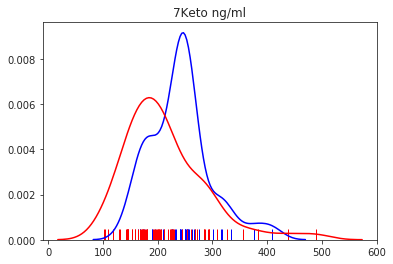

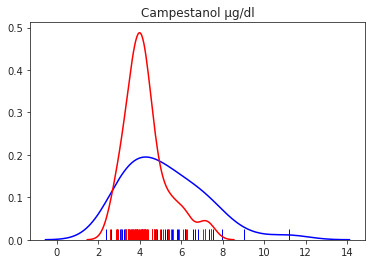

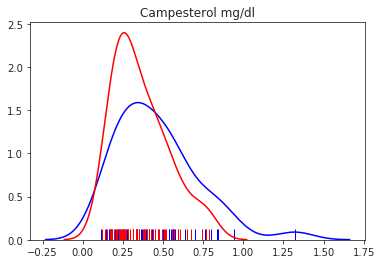

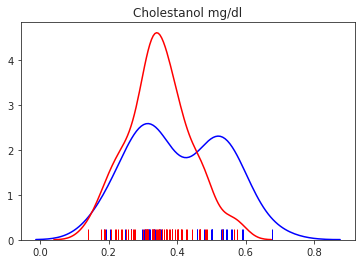

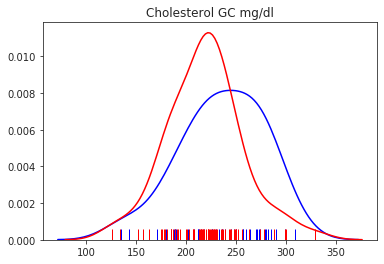

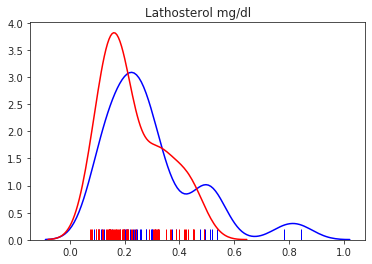

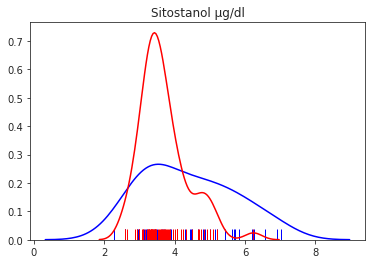

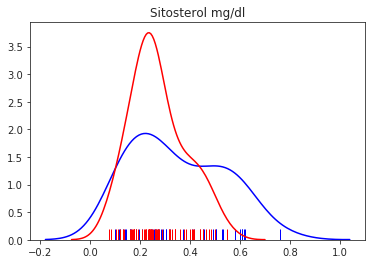

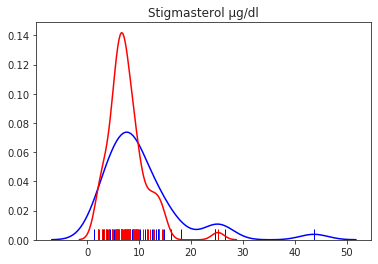

In [287]:
print ("Welsch Test for each chol between healthy and Parkinson individuals")
print ("Significance: 5 %")
print ()
a=0
for i in chols_withgroup.columns[0:-1]:
    result=stats.ttest_ind(target_control[i],target_sick[i],equal_var=False)
    if result[1]<0.05:
        a+=1
        print (i)
        print (result)
        plt.figure(i)
        sns.distplot(target_control[[i]], hist=False, rug=True,color="Blue").set_title(i)
        sns.distplot(target_sick[[i]], hist=False, rug=True,color="Red").set_title(i)
        print ()
print ("Cholesterols we keep:",a)

Welsch Test for each chol between healthy and Parkinson individuals
Significance: 1 %

Campestanol µg/dl
Ttest_indResult(statistic=2.8093035348609066, pvalue=0.00700673055725035)

Sitostanol µg/dl
Ttest_indResult(statistic=3.104421008463332, pvalue=0.003112166250017411)

Cholesterols we keep: 2


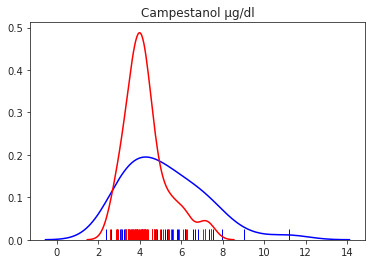

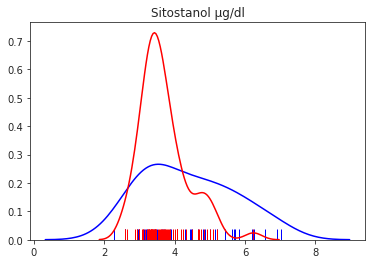

In [288]:
print ("Welsch Test for each chol between healthy and Parkinson individuals")
print ("Significance: 1 %")
print ()
a=0
for i in chols_withgroup.columns[0:-1]:
    result=stats.ttest_ind(target_control[i],target_sick[i],equal_var=False)
    if result[1]<0.01:
        a+=1
        print (i)
        print (result)
        plt.figure(i)
        sns.distplot(target_control[[i]], hist=False, rug=True,color="Blue").set_title(i)
        sns.distplot(target_sick[[i]], hist=False, rug=True,color="Red").set_title(i)
        print ()
print ("Cholesterols we keep:",a)

In [ ]:
# Kolmogorov–Smirnov test to compare the distributions
print ("KS Test for each chol between healthy and Parkinson individuals")
print ()
a=0
for i in chols_withgroup.columns[0:-1]:
    result_ks=stats.ks_2samp(target_control[i],target_sick[i])
    result_tt=stats.ttest_ind(target_control[i],target_sick[i],equal_var=False)
    print (i)
    print (result_ks)
    print (result_tt)
    plt.figure(i)
    sns.distplot(target_control[[i]], hist=False, rug=True,color="Blue").set_title(i)
    sns.distplot(target_sick[[i]], hist=False, rug=True,color="Red").set_title(i)
    print()

In [55]:
chols_nogroup=chols_withgroup.drop("Group_IPD",1)

KS Test for each chol between healthy and Parkinson individuals

24OH ng/ml KstestResult(statistic=1.0, pvalue=0.0)

25OH ng/ml KstestResult(statistic=0.9999696406260734, pvalue=0.0)

27OH ng/ml KstestResult(statistic=1.0, pvalue=0.0)

4ß ng/ml KstestResult(statistic=1.0, pvalue=0.0)

7Keto ng/ml KstestResult(statistic=1.0, pvalue=0.0)

7aOH ng/ml KstestResult(statistic=1.0, pvalue=0.0)

7ß ng/ml KstestResult(statistic=0.9999999999994198, pvalue=0.0)

Brassicasterol µg/dl KstestResult(statistic=1.0, pvalue=0.0)

Campestanol µg/dl KstestResult(statistic=0.9908625324694273, pvalue=1.4078933222509873e-216)

Campesterol mg/dl KstestResult(statistic=0.5441918266336001, pvalue=5.9704019507540235e-30)

Cholestanol mg/dl KstestResult(statistic=0.5612045498657324, pvalue=5.334302225758874e-32)

Cholesterol GC mg/dl KstestResult(statistic=1.0, pvalue=0.0)

Desmosterol mg/dl KstestResult(statistic=0.5255148865953049, pvalue=8.405414790727842e-28)

DihydroLanesterol µg/dl KstestResult(statistic=0.

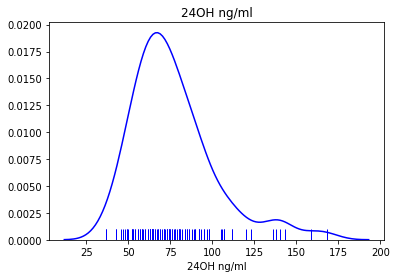

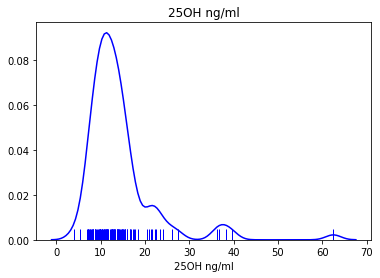

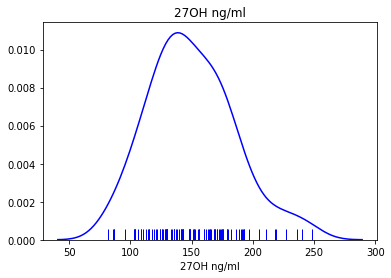

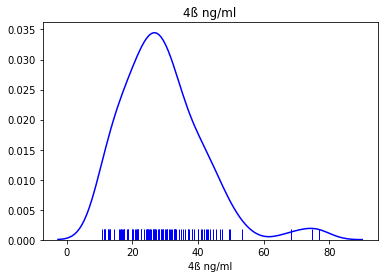

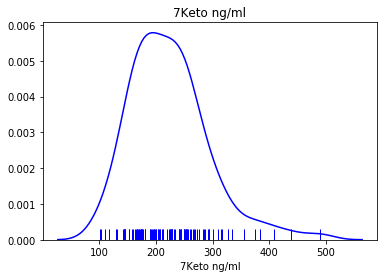

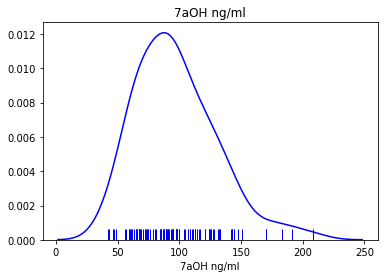

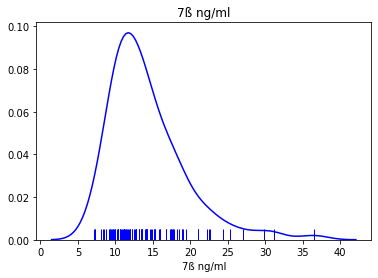

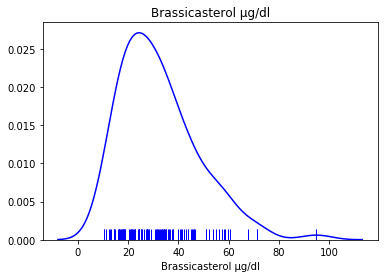

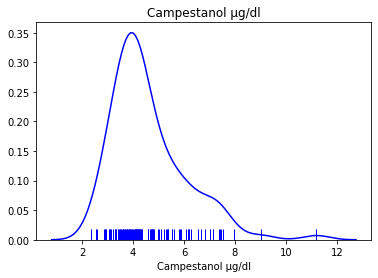

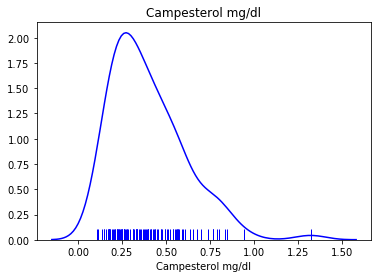

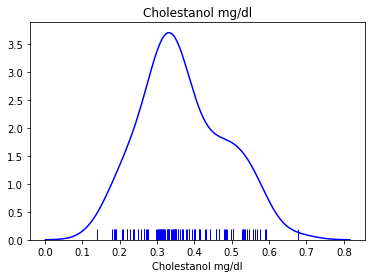

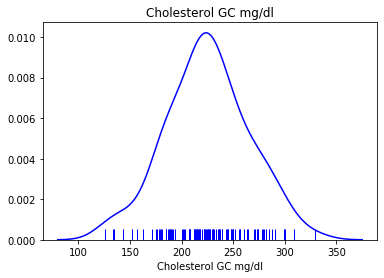

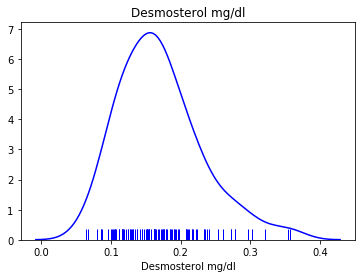

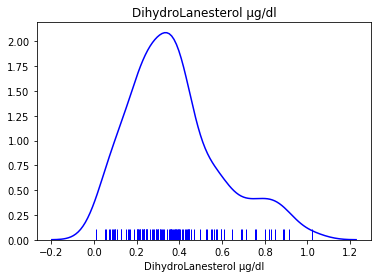

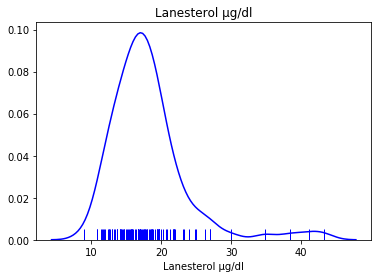

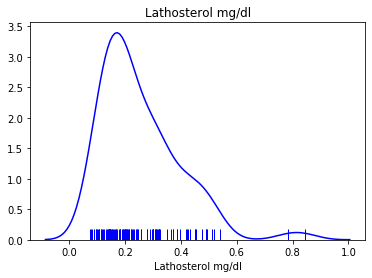

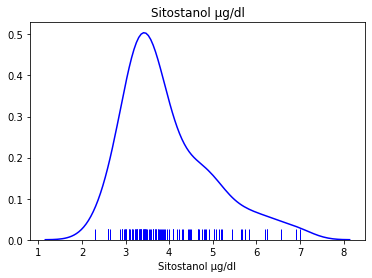

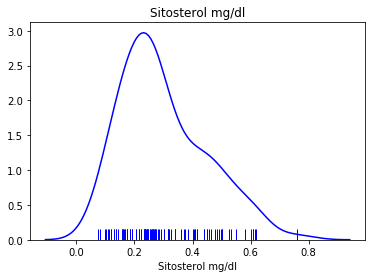

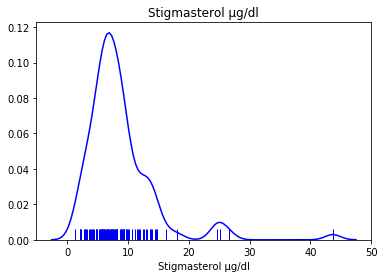

In [66]:
# Kolmogorov–Smirnov test to compare Chols to normal
print ("KS Test for each chol between healthy and Parkinson individuals")
print ()

for i in chols_nogroup.columns:
    plt.figure(i)
    sns.distplot(chols_nogroup[i], hist=False, rug=True,color="Blue").set_title(i)
    result_ks=stats.kstest(chols_nogroup[i],'norm')
    print (i,result_ks)
    print ()


In [ ]:
#all normally distributed!
#now make principial components analysis and MANOVE https://github.com/marsja/jupyter/blob/master/MANOVA_Test_in_Python_Statsmodels_Example.ipynb

In [306]:
#Strategy: Combine t-test and KS-test to select those cholesterols that differ in mean and distribution significantly
#significance lvl: 10 %
# We keep: 7Keto ng/ml, Campestanol µg/dl, Campesterol mg/dl, Cholestanol mg/dl, Cholesterol GC mg/dl
#          Lathosterol mg/dl, Sitostanol µg/dl, Sitosterol mg/dl, Stigmasterol µg/dl

# We drop: - 24OH ng/ml, 25OH ng/ml, 27OH ng/ml, 4ß ng/ml, 7aOH ng/ml, 7ß ng/ml, Brassicasterol µg/dl
#            Desmosterol mg/dl, DihydroLanesterol µg/dl, Lanesterol µg/dl, 
dfs.columns

Index(['24OH ng/ml', '25OH ng/ml', '27OH ng/ml', '4ß ng/ml', '7Keto ng/ml',
       '7aOH ng/ml', '7ß ng/ml', 'Brassicasterol µg/dl', 'Campestanol µg/dl',
       'Campesterol mg/dl', 'Cholestanol mg/dl', 'Cholesterol GC mg/dl',
       'Desmosterol mg/dl', 'DihydroLanesterol µg/dl', 'Lanesterol µg/dl',
       'Lathosterol mg/dl', 'Sitostanol µg/dl', 'Sitosterol mg/dl',
       'Stigmasterol µg/dl'],
      dtype='object')

In [314]:
# write only those to output fil eand try gemma 
dfs_quantile_picked=dfs_quantile.drop(['24OH ng/ml', '25OH ng/ml', '27OH ng/ml', '4ß ng/ml','7aOH ng/ml', '7ß ng/ml', 'Brassicasterol µg/dl','Desmosterol mg/dl', 'DihydroLanesterol µg/dl','Lanesterol µg/dl'],axis=1)

In [316]:
dfs_quantile_picked.to_csv("../Cholesterol_Data/cholesterole_picked_quantilenormed.txt",index=False,header=False,sep="\t")

In [318]:
dfs_quantile_picked.columns

Index(['7Keto ng/ml', 'Campestanol µg/dl', 'Campesterol mg/dl',
       'Cholestanol mg/dl', 'Cholesterol GC mg/dl', 'Lathosterol mg/dl',
       'Sitostanol µg/dl', 'Sitosterol mg/dl', 'Stigmasterol µg/dl'],
      dtype='object')

In [ ]:
################# old code #################

In [36]:
confounder_encoded_imputed_scaled.columns

Index(['intercept', 'Age_visit', 'time_diag_entry', 'coffee', 'alcohol',
       'Sex_female', 'Sex_male', 'Ethnicity_Asian', 'Ethnicity_Black African',
       'Ethnicity_Caribbean African', 'Ethnicity_Caucasian',
       'Ethnicity_North African/Arabic', 'Smoking_current', 'Smoking_ex',
       'Smoking_never', 'levodopa_N', 'levodopa_Y', 'Group_HCPD', 'Group_IPD'],
      dtype='object')

In [28]:
#drop all categ features to check if thats the cause of the GSL error
confounder_encoded_imputed_scaled_less=confounder_encoded_imputed_scaled.drop(['Sex_female', 'Ethnicity_Asian', 'Ethnicity_Black African',
       'Ethnicity_Caribbean African', 'Ethnicity_Caucasian',
       'Ethnicity_North African/Arabic', 'Smoking_current', 'Smoking_ex',
       'Smoking_never', 'levodopa_N', 'levodopa_Y', 'Group_HCPD', 'Group_IPD'],1)

In [34]:
confounder_encoded_imputed_scaled_less.to_csv("../Clinical_Data/confounder_scaled_input_intercept_LESS.csv",sep="\t",index=False,header=False)
confounder_encoded_imputed_scaled_less.to_csv("../Aetionomy/gemma_and_files/confounder_scaled_input_intercept_LESS.txt",sep="\t",index=False,header=False)

In [47]:
# Sort the dataframe by target
target_0 = iris.loc[iris['target'] == 0]
target_1 = iris.loc[iris['target'] == 1]
target_2 = iris.loc[iris['target'] == 2]

sns.distplot(target_0[['sepal length (cm)']], hist=False, rug=True)
sns.distplot(target_1[['sepal length (cm)']], hist=False, rug=True)
sns.distplot(target_2[['sepal length (cm)']], hist=False, rug=True)

sns.plt.show()confounder_encoded_imputed_scaled_fewer=confounder_encoded_imputed_scaled.drop(['Ethnicity_Asian', 'Ethnicity_Black African',
       'Ethnicity_Caribbean African', 'Ethnicity_Caucasian',
       'Ethnicity_North African/Arabic',"Group_HCPD","Group_IPD","levodopa_N","levodopa_Y","Smoking_current" ,"Smoking_ex","Smoking_never","Sex_female"],1)

In [48]:
confounder_encoded_imputed_scaled_fewer

,intercept,Age_visit,time_diag_entry,coffee,alcohol,Sex_male
AETID,,,,,,
AET0044,1,0.062505,0.025502,3.0,2.0,0
AET0380,1,0.890703,0.081829,3.0,1.0,1
AET0027,1,-2.185458,-0.457147,2.0,1.0,0
AET0049,1,1.009017,-0.987839,3.0,2.0,0
AET0006,1,0.890703,0.233140,3.0,2.0,1
...,...,...,...,...,...,...
AET0021,1,-0.292436,1.306674,3.0,2.0,0
AET0071,1,0.417447,0.970366,3.0,3.0,1
AET0138,1,0.417447,-0.462669,3.0,2.0,0


In [127]:
confounder_encoded_imputed_scaled.to_csv("../Clinical_Data/Confounder6_scaled_input_intercept.csv",sep="\t",index=False,header=False)
confounder_encoded_imputed_scaled.to_csv("../Aetionomy/gemma_and_files/Confounder6_scaled_input_intercept.txt",sep="\t",index=False,header=False)

In [40]:
#write output
confounder_encoded_imputed_scaled.to_csv("../Clinical_Data/confounder_scaled_input_intercept.csv", sep="\t",index=False,header=False)

In [54]:
####################################################################################################################

In [53]:
##write outputs for confounder correction model manually
confounder_encoded_imputed=confounder_encoded_imputed.drop("intercept",1)
confounder_encoded_imputed.to_csv("../Clinical_Data/confounder_raw_input_indices.csv", sep="\t",index=True,header=True)

In [42]:
confounder_encoded_imputed_scaled=confounder_encoded_imputed_scaled.drop("intercept",1)
confounder_encoded_imputed_scaled.to_csv("../Clinical_Data/confounder_scaled_input_indices.csv", sep="\t",index=True,header=True)

In [ ]:
#done